In [ ]:
!gdown 12UpCHTzFoXeql4NWBe7y8aCEX8TZKbbq

Downloading...
From: https://drive.google.com/uc?id=12UpCHTzFoXeql4NWBe7y8aCEX8TZKbbq
To: /content/Default_loan_dataset.csv
100% 100M/100M [00:00<00:00, 192MB/s] 


In [ ]:
import pandas as pd

import pandas as pd
# reading
data = pd.read_csv('Default_loan_dataset.csv')

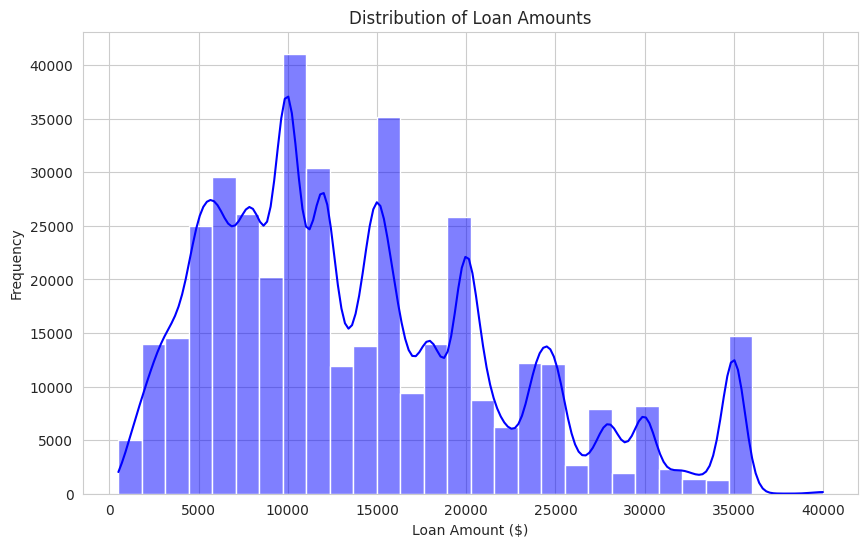

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


plt.figure(figsize=(10, 6))
sns.histplot(data['loan_amnt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.show()


The distribution of loan amounts shows a right-skewed pattern, indicating that most loan applications are for smaller amounts, with fewer applications for very high loan amounts. There are visible spikes around rounded figures (e.g.,  10,000, 15,000, $20,000), suggesting that borrowers tend to request loan amounts in these rounded figures.

<ipython-input-121-5d1c3febbe01>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




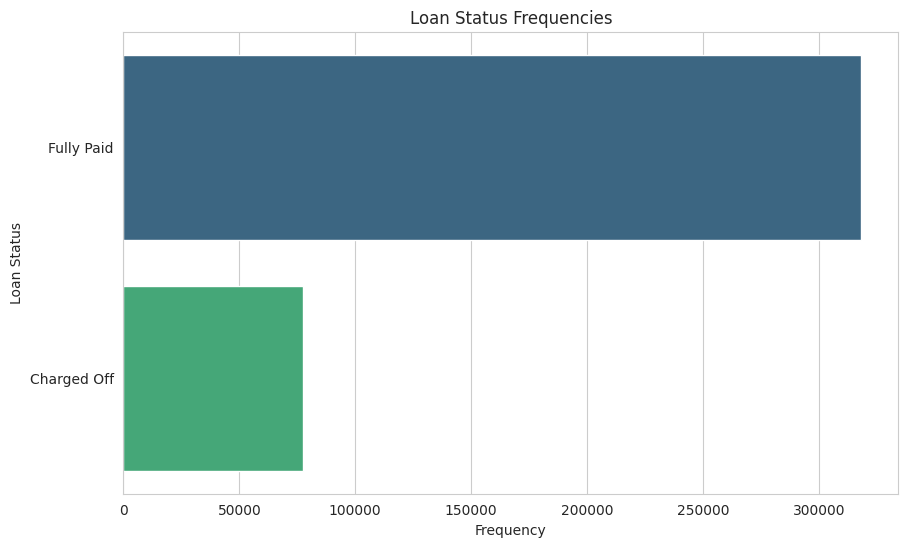

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='loan_status', data=data, order = data['loan_status'].value_counts().index, palette='viridis')
plt.title('Loan Status Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Loan Status')
plt.show()

We can see that the loan status frequencies reveals the predominant states of loans in this dataset. It highlights the most common statuses, such as "Fully Paid" and "Charged Off", among others. This distribution is crucial for understanding the overall performance of the loans and the risk profile.

<ipython-input-122-7b2aa14c4641>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




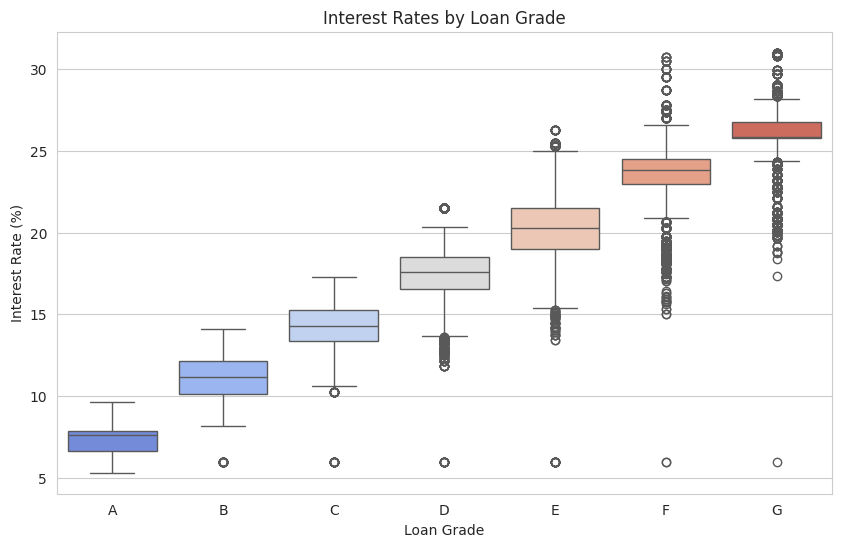

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='int_rate', data=data, order=sorted(data['grade'].unique()), palette='coolwarm')
plt.title('Interest Rates by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')
plt.show()

<ipython-input-123-eb64bb77f560>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-123-eb64bb77f560>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




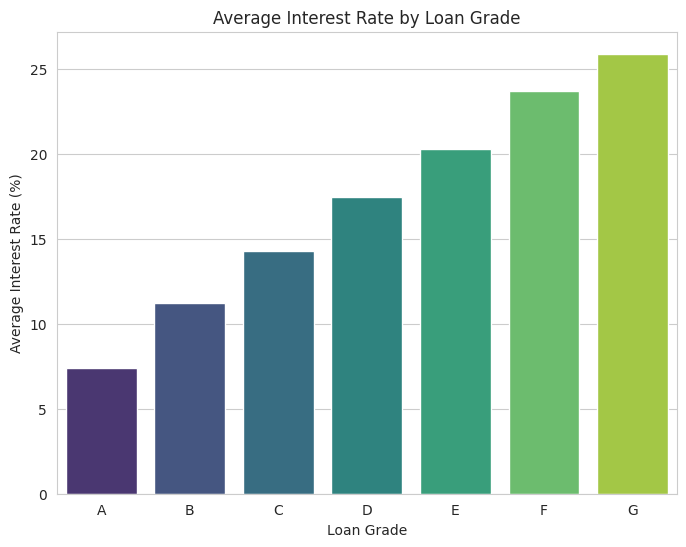

In [ ]:
import numpy as np
plt.figure(figsize=(8, 6))
sns.barplot(x='grade', y='int_rate', data=data, estimator=np.mean, ci=None, palette='viridis', order=sorted(data['grade'].unique()))
plt.title('Average Interest Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Average Interest Rate (%)')
plt.show()

The boxplot and bar graph showing interest rates by loan grade clearly illustrates a positive relationship between loan grade and interest rate. As the grade progresses from A to G, indicating a move from lower to higher risk, the median interest rate increases. This suggests that borrowers with higher risk (lower grade) are charged higher interest rates, as expected.

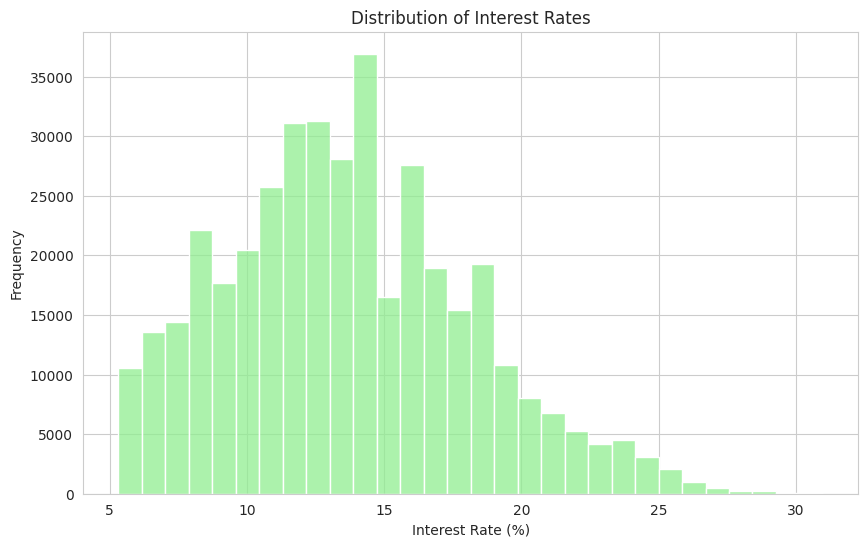

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(data['int_rate'], bins=30, color='lightgreen')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')

plt.show()

Distribution of Interest Rates: Interest rates have a somewhat normal distribution, but with a right skew, indicating that while most loans have a moderate interest rate, there's a significant number of loans with higher interest rates.

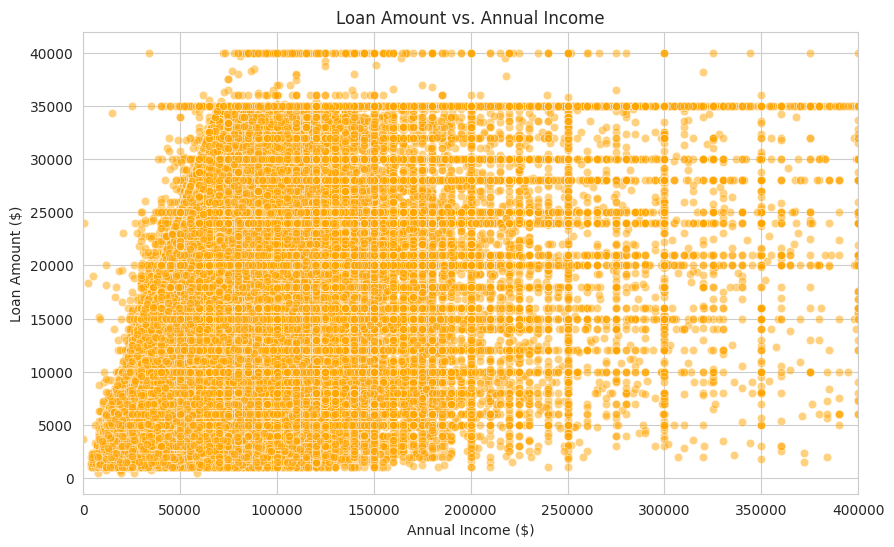

In [ ]:
plt.figure(figsize=(10, 6))

# Loan vs. Annual Income
sns.scatterplot(x='annual_inc', y='loan_amnt', data=data, alpha=0.5, color='orange')
plt.xlim(0, 400000)
plt.title('Loan Amount vs. Annual Income')
plt.xlabel('Annual Income ($)')
plt.ylabel('Loan Amount ($)')

plt.show()

Loan Amount vs. Annual Income: The scatter plot indicates a positive relationship between annual income and loan amount, which is intuitive. As borrowers' annual incomes increase, they tend to qualify for larger loan amounts.

In [ ]:
data['term'] = data['term'].str.extract('(\d+)').astype(int)
data['term'].head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

Converting this column into a numerical one to plot correlation matrix.

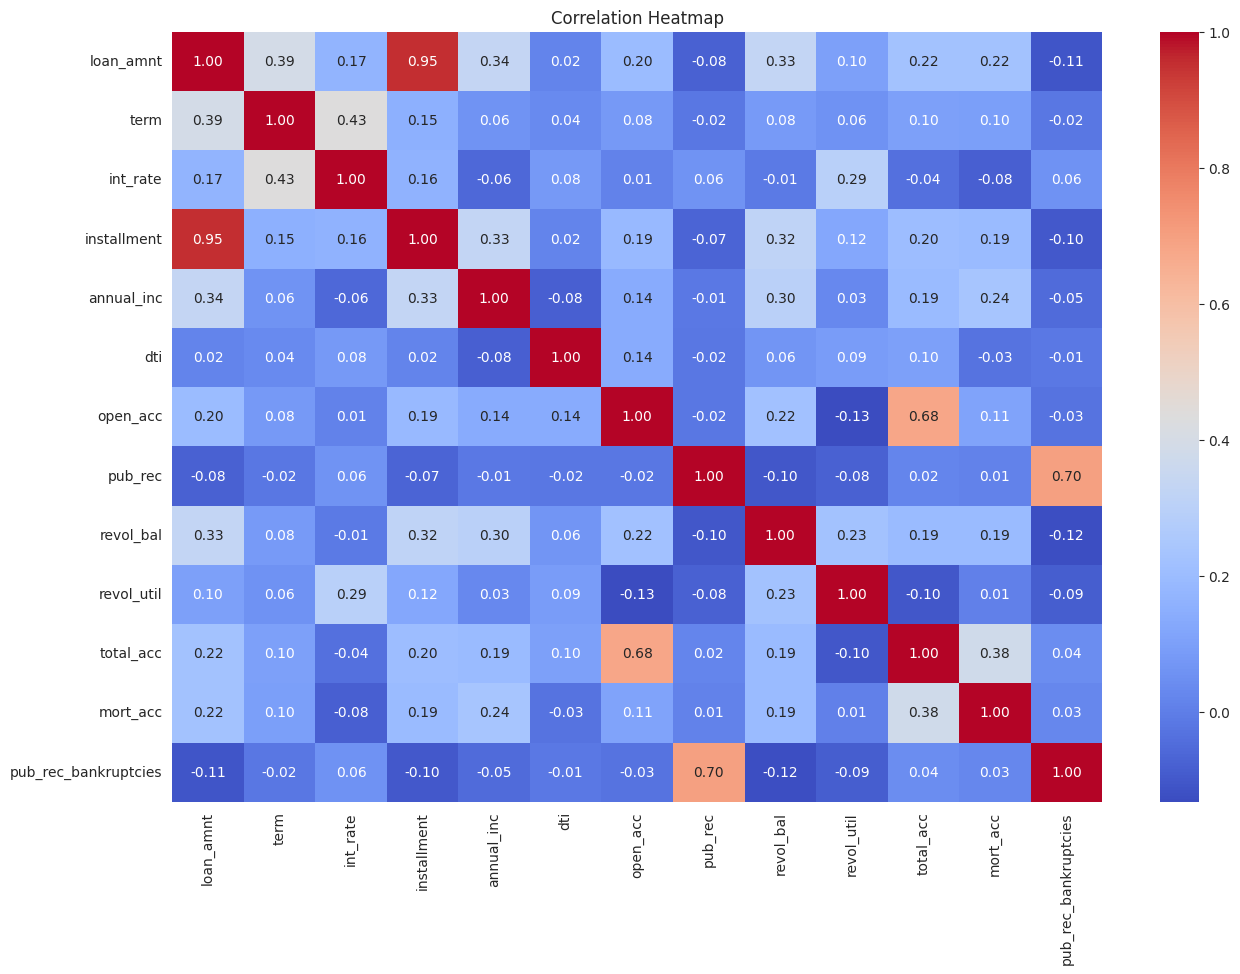

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

High Correlation Loan Amount (loan_amnt) & Installment (installment): With a coefficient of 0.95, this suggests a very strong positive relationship. As loan amounts increase, the installments also increase, which is intuitive since larger loans will generally have larger monthly payments.
Moderate Correlation Loan Amount (loan_amnt) & Loan Term (term): The correlation coefficient of 0.39 indicates a moderate positive relationship, suggesting that larger loans are often associated with longer repayment terms.
Loan Term (term) & Interest Rate (int_rate): A coefficient of 0.43 implies a moderate positive relationship, which could mean that longer-term loans may have higher interest rates, potentially due to increased risk over time.
Total Number of Credit Lines (total_acc) & Number of Open Credit Lines (open_acc): The coefficient of 0.68 suggests a moderate-to-strong relationship, indicating that individuals with more open credit lines tend to have a higher total number of credit lines (both open and closed).
Public Records (pub_rec) & Public Record Bankruptcies (pub_rec_bankruptcies): With a correlation coefficient of 0.70, this shows a strong positive relationship, which is logical since public record bankruptcies are a type of derogatory public record.
Low or No Correlation Debt to Income Ratio (dti) & Loan Amount (loan_amnt): The low correlation of 0.02 implies there is no significant linear relationship between the debt-to-income ratio and the loan amount.

<ipython-input-128-fded6fda3cab>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




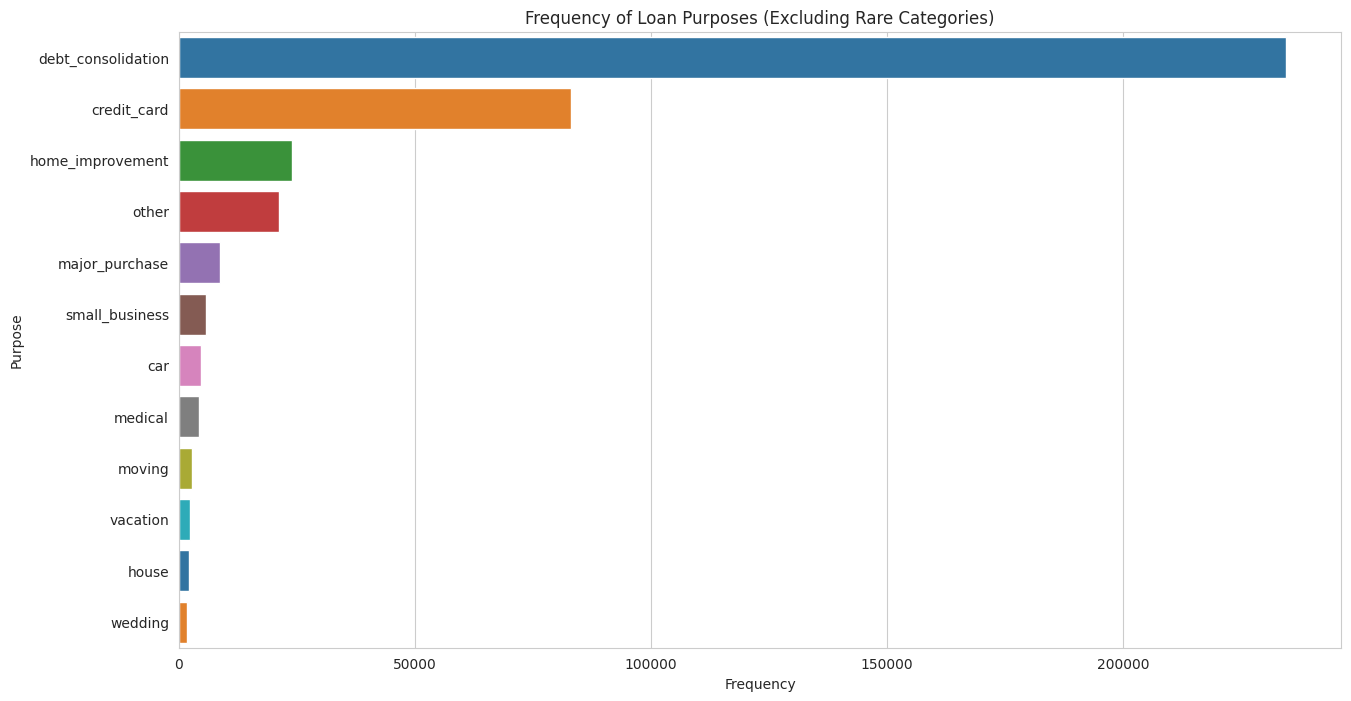

In [ ]:
data_filtered = data[~data['purpose'].isin(['renewable_energy', 'educational'])]

plt.figure(figsize=(15, 8))
# countplot
sns.countplot(y='purpose', data=data_filtered, order=data_filtered['purpose'].value_counts().index, palette='tab10')
plt.title('Frequency of Loan Purposes (Excluding Rare Categories)')
plt.xlabel('Frequency')
plt.ylabel('Purpose')
plt.show()

Debt Consolidation: This category has the highest frequency by a significant margin. This suggests that the majority of the loans in this dataset have been taken out for the purpose of consolidating existing debt. This is common as individuals often seek to consolidate multiple debt payments into one, usually with the aim of securing a lower interest rate or a more manageable payment plan.
Credit Card: The second most common purpose for loans is credit card payments. This indicates that a large number of borrowers are using loans to pay off or manage their credit card debt.
Home Improvement: This follows as the next most frequent purpose, suggesting that a fair number of borrowers are investing in renovations or repairs.
Categories such as 'major purchase', 'small business', 'car', 'medical', 'moving', 'vacation', 'house', 'wedding', 'renewable_energy', and 'educational' represent a smaller proportion of loans.
Additionally I exclude two categories which are renewable_energy' and 'educational', which are the least common purposes for loans because they have the smallest bars close to negligible.

<ipython-input-129-e998784c731f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




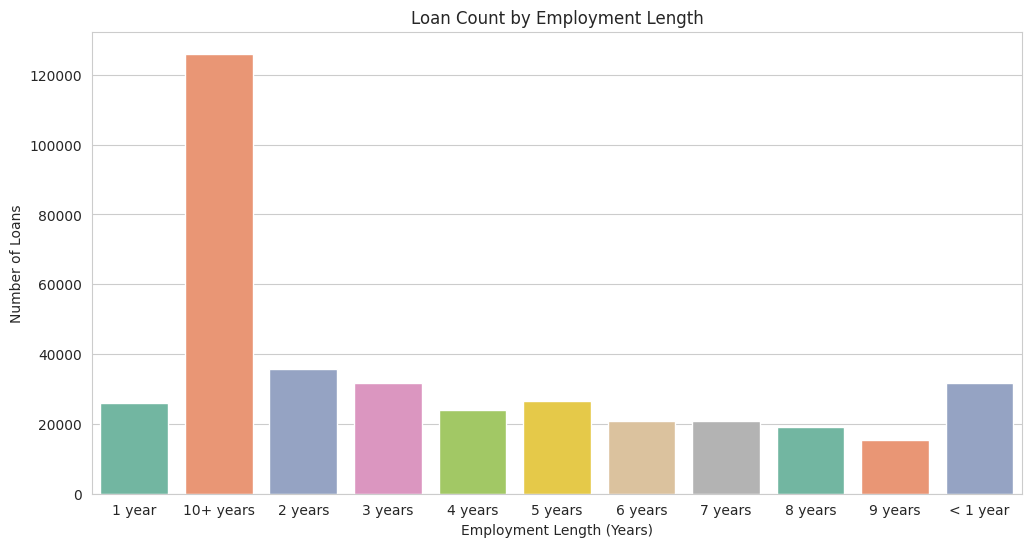

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='emp_length', data=data, order=sorted(data['emp_length'].dropna().unique()), palette='Set2')
plt.title('Loan Count by Employment Length')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Number of Loans')
plt.show()

10+ Years of Employment: This group has the highest number of loans by a significant margin. This could suggest that borrowers with a longer employment history are either more likely to seek loans or are considered more favorable by lenders, perhaps due to stability in income.
2 Years of Employment and Less Than 1 Yearof employment : This group appears to have the second-highest number of loans. It's interesting that this specific duration stands out, as it may indicate a common point in people's careers when they seek additional financial assistance.
Other Employment Lengths: The numbers of loans for other employment lengths (from 2 to 9 years and 1 year) are relatively balanced, with no specific duration showing a dramatic difference from the others. This suggests a fairly even distribution across these categories.
Length of employment is likely a factor in loan approval, but not an exclusive one, as even those with less than one year of employment are receiving loans.

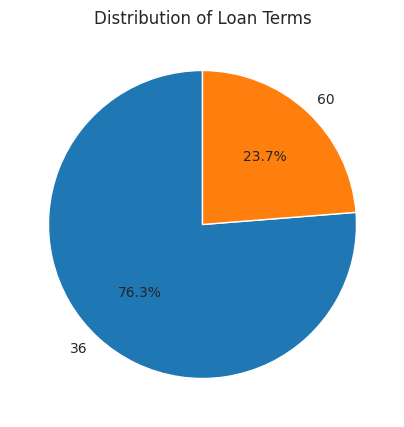

In [ ]:
plt.figure(figsize=(5, 5))
data['term'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Loan Terms')
plt.ylabel('')
plt.show()

<ipython-input-131-4e9173f6338e>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




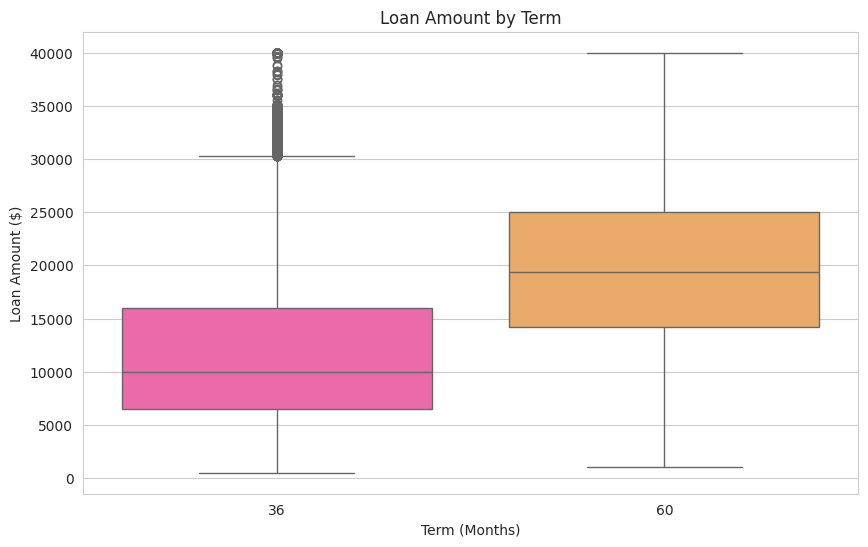

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='term', y='loan_amnt', data=data, palette='spring')
plt.title('Loan Amount by Term')
plt.xlabel('Term (Months)')
plt.ylabel('Loan Amount ($)')
plt.show()

Pie Chart - Distribution of Loan Terms:
The pie chart reveals the proportion of loans split between two terms: 36 months and 60 months. A significant majority of loans (76.3%) have a term of 36 months, making it the most common loan term in the dataset. The remaining portion (23.7%) represents loans with a term of 60 months. Box Plot - Loan Amount by Term:
Box plot - Distribution of loan amounts for the two different loan terms
For 36-month loans, the median loan amount is lower than that of the 60-month loans. This is evident from the median line within the pink box being closer to the bottom of the range.
The box plot for 36-month loans shows a tighter interquartile range (IQR), which means there's less variability in loan amounts compared to the 60-month loans.
There are a significant number of outliers for the 36-month term, which are represented by points above the upper whisker. These outliers indicate that there are quite a few 36-month loans with amounts higher than the general spread.
For 60-month loans, the median loan amount is higher, and the IQR is wider, suggesting more variability in the loan amounts. However, there are fewer outliers compared to the 36-month loans.

<ipython-input-132-73b77ef0d70a>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




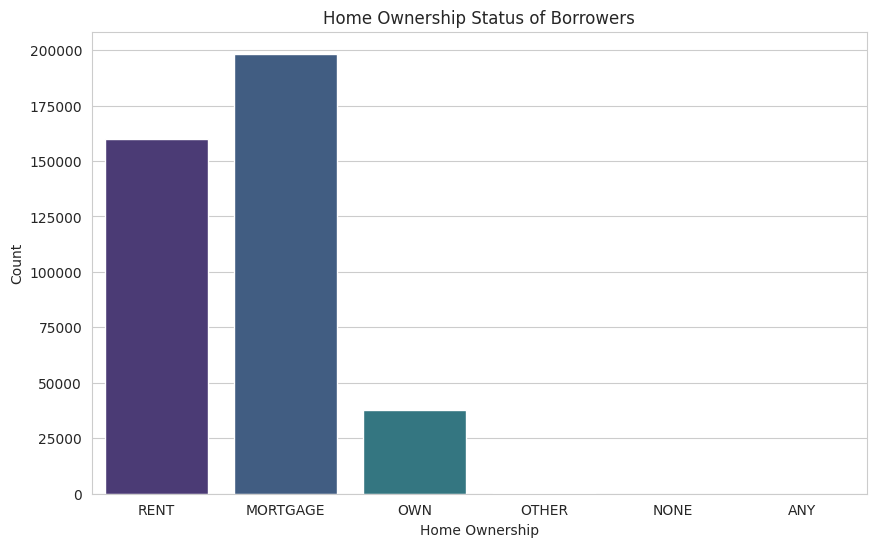

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', data=data, palette='viridis')
plt.title('Home Ownership Status of Borrowers')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

Risk Assessment:The graph is useful in knowing the home ownership status which can help assess the risk profile of borrowers, as homeowners with a mortgage might have different financial behaviors and obligations compared to renters.
Mortgage: This category has the highest count, indicating that the majority of borrowers in dataset are homeowners with a mortgage. The next highest group is renters.
Own: A smaller proportion of the borrowers fully own their home without a mortgage. This group might represent those who have successfully paid off their mortgages. We will check later about this.
Other and None: This category is nearly negligible in the dataset, which would suggest very few borrowers report having no home ownership status, perhaps due to being homeless or transient.
Any: There are no borrowers who have indicated 'any' as their home ownership status, or the number is too small to be visible on the chart.

<ipython-input-133-2cba2f0a1de8>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




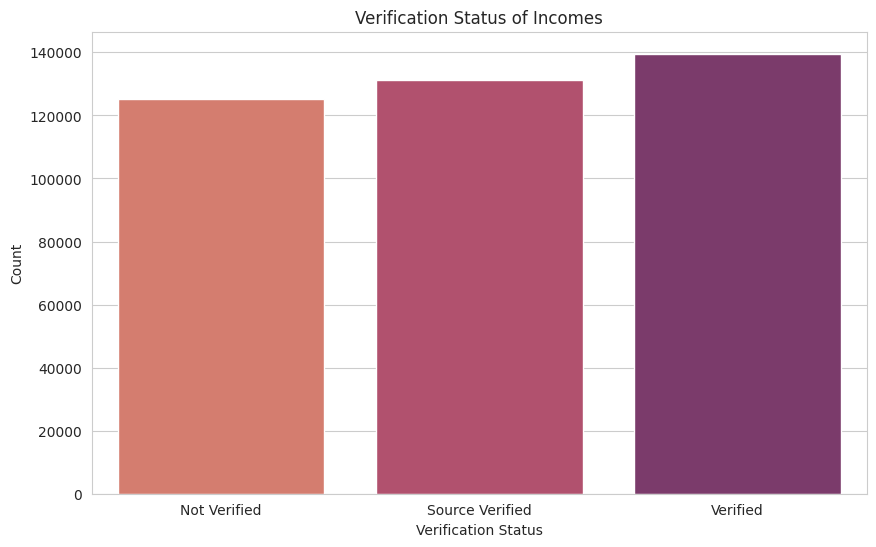

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='verification_status', data=data, palette='flare')
plt.title('Verification Status of Incomes')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.show()

Not Verified: The count for loans where the borrower's income was not verified is slightly less than for loans with verified income. This suggests a substantial number of loans were issued without formal income verification.
Source Verified: There is a higher count of loans in the category where the source of the borrower's income was verified. This might imply a process where the lender checked the income source but did not verify the actual income amount.
Verified: The count for fully verified incomes is the highest among the three categories. This indicates that a significant portion of the borrowers in this dataset had their income fully verified, which could be a measure taken by lenders to ensure the reliability of the income data provided by borrowers.
We can intrepret from this graph that Verified incomes could indicate lower credit risk, as the lender has confirmation of the borrower's ability to repay the loan.

<ipython-input-134-d78cfcda83fa>:6: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.



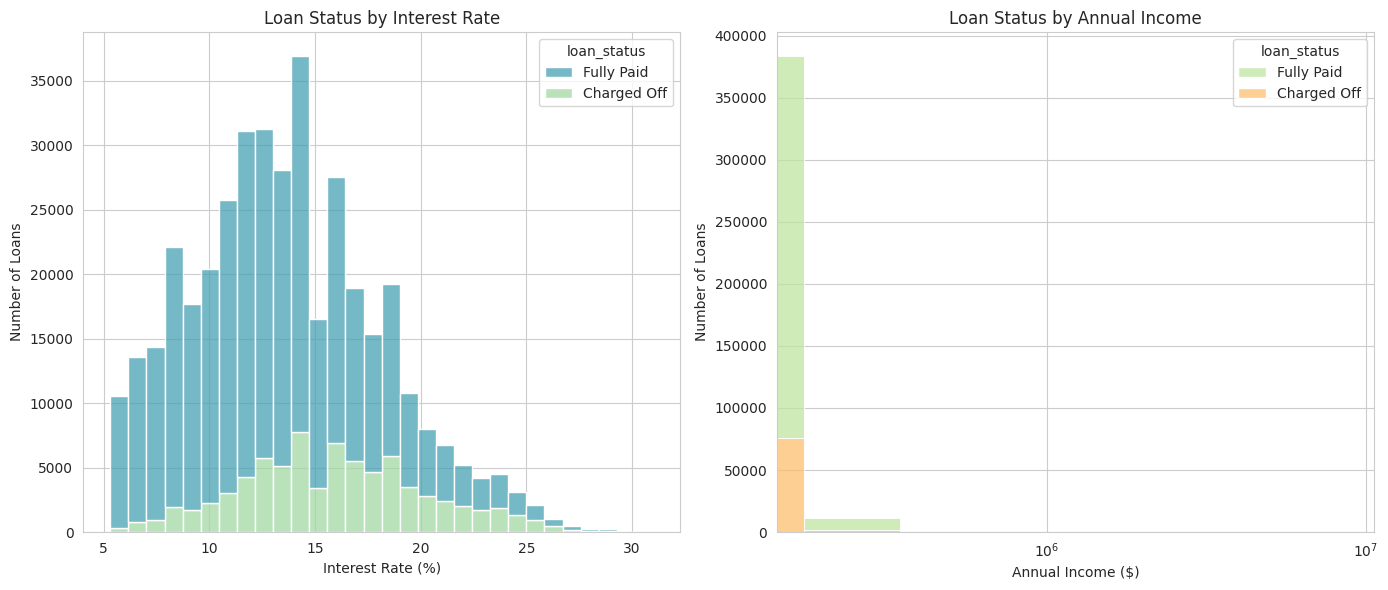

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=data, x='int_rate', hue='loan_status', multiple='stack', bins=30,palette=['#47a0b3', '#a2d9a4', '#edf8a3', '#fee999', '#fca55d', '#e2514a'])
plt.title('Loan Status by Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Number of Loans')

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='annual_inc', hue='loan_status', multiple='stack', bins=50,palette="Spectral_r")
plt.title('Loan Status by Annual Income')
plt.xlabel('Annual Income ($)')
plt.ylabel('Number of Loans')
plt.xscale('log')

plt.tight_layout()
plt.show()

Loan Status by Interest Rate:
The histogram shows a distribution of loans across different interest rates, representing different loan statuses. Most loans, whether fully paid or charged off, are concentrated in the middle interest rate range.
There's a visible decrease in the number of loans as the interest rate increases, which is a common pattern since higher interest rates generally correlate with higher risk and fewer borrowers qualifying.
Second histogram illustrates the distribution of loans across various annual incomes, again categorized by loan status. The x-axis is on a logarithmic scale to account for the wide distribution of incomes, making it easier to visualize the spread across several orders of magnitude.
It seems that a large number of loans are made to individuals with lower annual incomes, with the number of loans decreasing as income increases. This could suggest that people with lower incomes are more likely to seek loans.

In [ ]:
top_emp_titles = data['emp_title'].value_counts()[:20]
print(top_emp_titles)

emp_title
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: count, dtype: int64


<ipython-input-136-f421c5126dd1>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




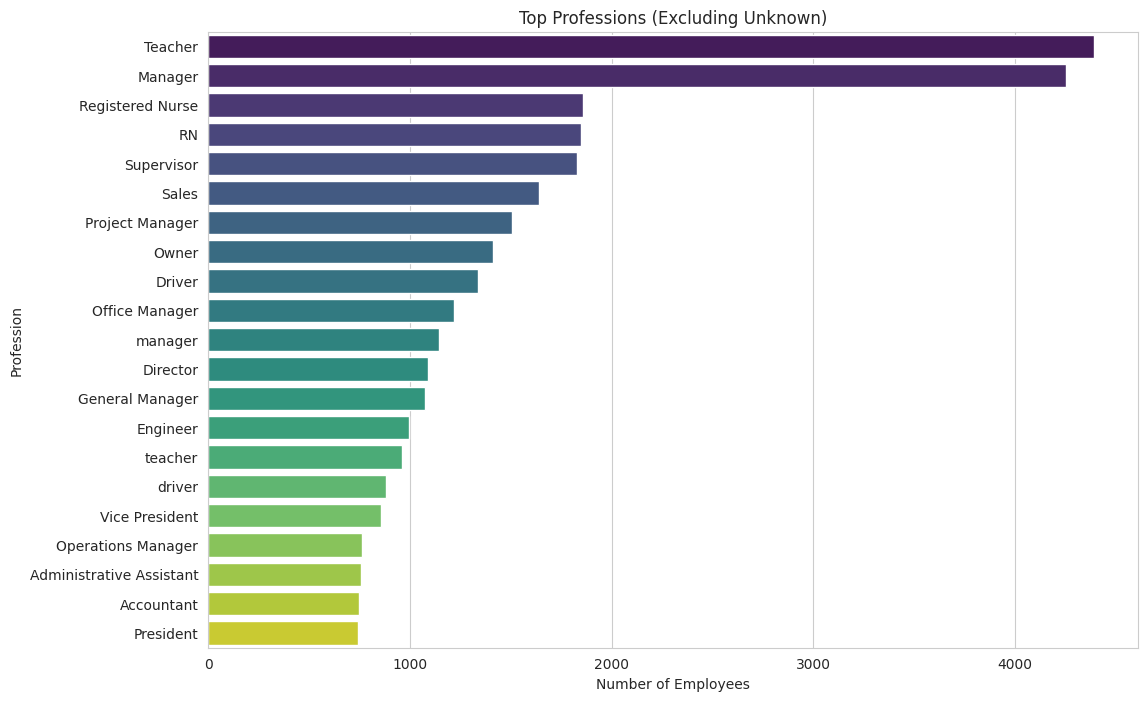

In [ ]:
top_emp_titles = data['emp_title'].value_counts().head(21)

top_emp_titles = top_emp_titles[top_emp_titles.index != 'Unknown']

plt.figure(figsize=(12, 8))
sns.barplot(y=top_emp_titles.index, x=top_emp_titles.values, palette='viridis')
plt.title('Top Professions (Excluding Unknown)')
plt.xlabel('Number of Employees')
plt.ylabel('Profession')
plt.show()

The 'Teacher' and 'Manager' categories top the chart, indicating they are the most common professions among the borrowers in this dataset.
The next most common professions are 'Registered Nurse', 'RN', and 'Supervisor', which are also well-represented.
Professions such as 'Sales', 'Project Manager', and 'Owner' follow, showing a diversity in the types of employment borrowers have.
There's a noticeable drop in frequency as we move down the list from the top professions to those like 'Vice President', 'Operations Manager', and 'Administrative Assistant', which appear less frequently.
Reason for Removing 'Unknown:
1.'Unknown' is removed to focus on specific, identifiable professions. Including 'Unknown' might skew the data analysis
Removing 'Unknown' allows for a clearer understanding of the actual professions that borrowers hold, which can be useful for profiling borrowers or understanding demographic patterns in loan uptake and repayment.
'Unknown' could represent a variety of actual jobs that were not specified by the borrowers, and keeping it in the analysis would prevent a true comparison between defined professions.
By removing 'Unknown', we ensure that the analysis only reflects known, specified employment titles, giving us better insight into the professional backgrounds of individuals who have successfully paid off their loans.

<ipython-input-137-bcdbf7b24bc0>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-137-bcdbf7b24bc0>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




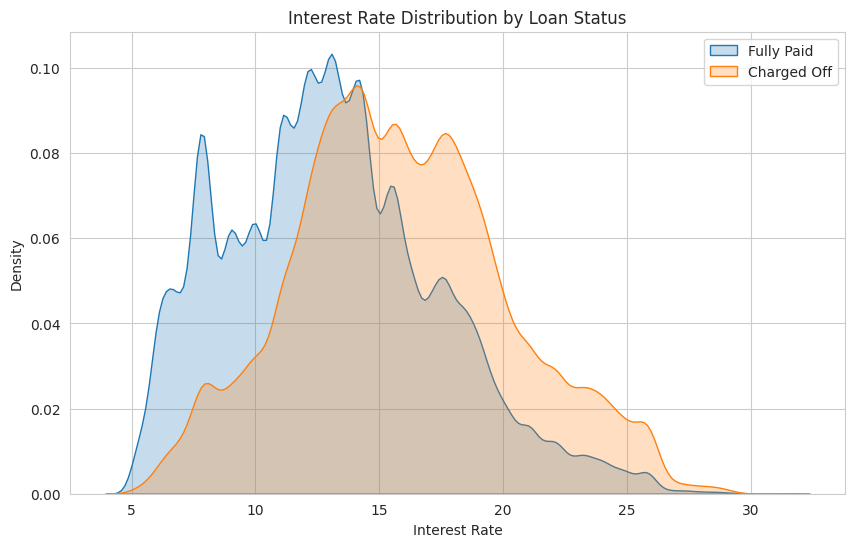

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['loan_status'] == 'Fully Paid']['int_rate'], label='Fully Paid', shade=True)
sns.kdeplot(data[data['loan_status'] == 'Charged Off']['int_rate'], label='Charged Off', shade=True)
plt.title('Interest Rate Distribution by Loan Status')
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.legend()
plt.show()


The visualization is a Kernel Density Estimate (KDE) plot comparing the distribution of interest rates between loans that are "Fully Paid" and those that are "Charged Off." Both distributions peak around 10-15%, with "Fully Paid" loans skewing towards the lower end of interest rates and "Charged Off" loans being more spread out with a slight skew towards higher interest rates. This suggests that loans with higher interest rates have a higher tendency to be charged off, while loans with lower interest rates are more likely to be paid in full.

In [ ]:
import plotly.graph_objects as go
import numpy as np
import plotly.express as px


box_loan_home = px.box(data, x='home_ownership', y='loan_amnt',
                       title='Loan Amount Distribution by Home Ownership',
                       labels={'home_ownership': 'Home Ownership', 'loan_amnt': 'Loan Amount ($)'},
                       color='home_ownership',
                       template='plotly_dark')


box_loan_home.show()


It is box plot analyzing loan amount distributions based on home ownership status. The plot reveals that individuals with mortgages tend to have higher loan amounts, as indicated by the wider interquartile range and higher median compared to other categories. Homeowners who own their residence have a wide range of loan amounts but a lower median than those with mortgages. The 'RENT' category shows that renters generally borrow less money. Additional statistics for the 'OWN' category are annotated on the plot, providing specific values such as the median loan amount of 12,000.

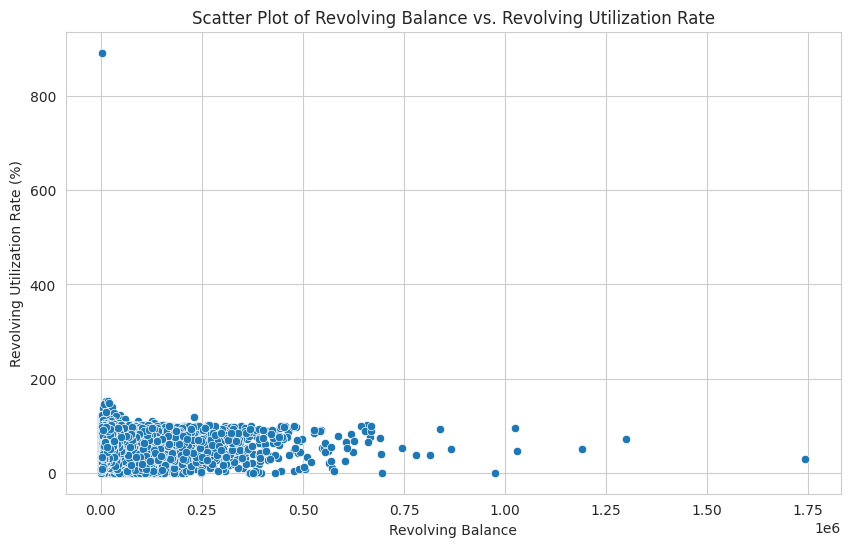

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='revol_bal', y='revol_util', data=data)
plt.title('Scatter Plot of Revolving Balance vs. Revolving Utilization Rate')
plt.xlabel('Revolving Balance')
plt.ylabel('Revolving Utilization Rate (%)')
plt.show()




<ipython-input-140-265cd0ac50fb>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




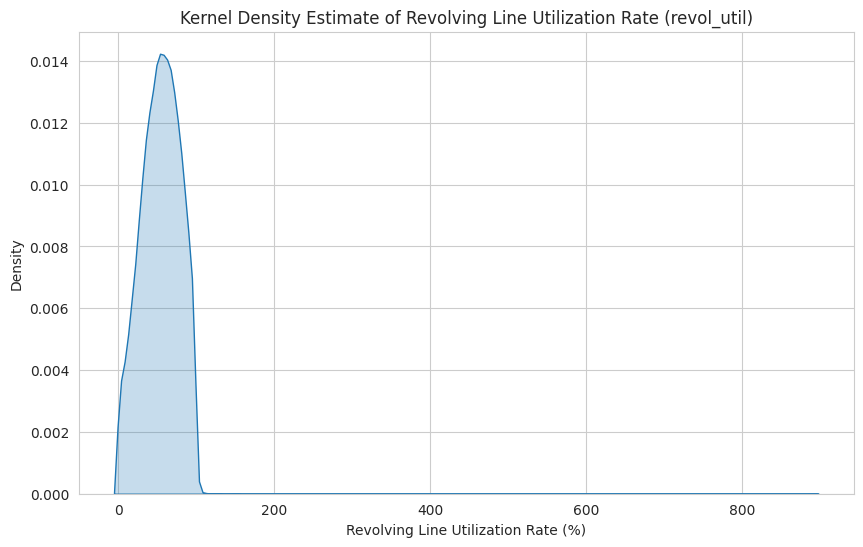

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['revol_util'], shade=True)
plt.title('Kernel Density Estimate of Revolving Line Utilization Rate (revol_util)')
plt.xlabel('Revolving Line Utilization Rate (%)')
plt.show()

The provided KDE plot shows the distribution of the Revolving Line Utilization Rate (revol_util) in a dataset. It has a prominent peak around the 50% mark, indicating this is the most common utilization rate, with a secondary peak near 100%, suggesting a significant number of individuals nearly max out their credit lines. The distribution skews right, with a tail beyond 100%, implying some overutilization. The warning in the plot signals a future deprecation related to handling infinity values, advising a pre-emptive data cleaning step. This visualization is indicative of credit behavior, with potential implications for financial risk assessment.

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

loan_amnt  term  int_rate  installment grade sub_grade  \
0    10000.0    36     11.44       329.48     B        B4   
1     8000.0    36     11.99       265.68     B        B5   
2    15600.0    36     10.49       506.97     B        B3   
3     7200.0    36      6.49       220.65     A        A2   
4    24375.0    60     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  \
0                Marketing  10+ years           RENT    117000.0   
1          Credit analyst     4 years       MORTGAGE     65000.0   
2             Statistician   < 1 year           RENT     43057.0   
3          Client Advocate    6 years           RENT     54000.0   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0   

  verification_status   issue_d  loan_status             purpose  \
0        Not Verified  Jan-2015   Fully Paid            vacation   
1        Not Verified  Jan-2015   Fully Paid  debt_consolidation   
2     Source Verified  Jan-2015   Fully Paid         credit_card   
3        Not Verified  Nov-2014   Fully Paid         credit_card   
4            Verified  Apr-2013  Charged Off         credit_card   

                     title    dti earliest_cr_line  open_acc  pub_rec  \
0                 Vacation  26.24         Jun-1990      16.0      0.0   
1       Debt consolidation  22.05         Jul-2004      17.0      0.0   
2  Credit card refinancing  12.79         Aug-2007      13.0      0.0   
3  Credit card refinancing   2.60         Sep-2006       6.0      0.0   
4    Credit Card Refinance  33.95         Mar-1999      13.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0    36369.0        41.8       25.0                   w       INDIVIDUAL   
1    20131.0        53.3       27.0                   f       INDIVIDUAL   
2    11987.0        92.2       26.0                   f       INDIVIDUAL   
3     5472.0        21.5       13.0                   f       INDIVIDUAL   
4    24584.0        69.8       43.0                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies  \
0       0.0                   0.0   
1       3.0                   0.0   
2       0.0                   0.0   
3       0.0                   0.0   
4       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650

In [ ]:
# General information about the dataset including data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

The dataset contains 396,030 entries and 27 columns

In [ ]:
data.describe()

loan_amnt           term       int_rate    installment  \
count  396030.000000  396030.000000  396030.000000  396030.000000   
mean    14113.888089      41.698053      13.639400     431.849698   
std      8357.441341      10.212038       4.472157     250.727790   
min       500.000000      36.000000       5.320000      16.080000   
25%      8000.000000      36.000000      10.490000     250.330000   
50%     12000.000000      36.000000      13.330000     375.430000   
75%     20000.000000      36.000000      16.490000     567.300000   
max     40000.000000      60.000000      30.990000    1533.810000   

         annual_inc            dti       open_acc        pub_rec  \
count  3.960300e+05  396030.000000  396030.000000  396030.000000   
mean   7.420318e+04      17.379514      11.311153       0.178191   
std    6.163762e+04      18.019092       5.137649       0.530671   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    4.500000e+04      11.280000       8.000000       0.000000   
50%    6.400000e+04      16.910000      10.000000       0.000000   
75%    9.000000e+04      22.980000      14.000000       0.000000   
max    8.706582e+06    9999.000000      90.000000      86.000000   

          revol_bal     revol_util      total_acc       mort_acc  \
count  3.960300e+05  395754.000000  396030.000000  358235.000000   
mean   1.584454e+04      53.791749      25.414744       1.813991   
std    2.059184e+04      24.452193      11.886991       2.147930   
min    0.000000e+00       0.000000       2.000000       0.000000   
25%    6.025000e+03      35.800000      17.000000       0.000000   
50%    1.118100e+04      54.800000      24.000000       1.000000   
75%    1.962000e+04      72.900000      32.000000       3.000000   
max    1.743266e+06     892.300000     151.000000      34.000000   

       pub_rec_bankruptcies  
count         395495.000000  
mean               0.121648  
std                0.356174  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                8.000000

# EDA

# Changing Data Type

In [ ]:
data.dtypes

loan_amnt               float64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [ ]:
data['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 396030, dtype: int64

### converting issue_d and earliest_cr_line from object to datetime

In [ ]:
data['issue_d'] = pd.to_datetime(data['issue_d'])
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])

<ipython-input-146-2f9ecc54f8c2>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-146-2f9ecc54f8c2>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



### converting the "earliest_cr_line" date to the number of days since the earliest credit line can provide a more informative and versatile representation of the credit history

In [ ]:
import datetime

current_date = datetime.datetime.now()

data['earliest_cr_line'] = (current_date - data['earliest_cr_line']).dt.days

### converting object type to category for columns that has categorical values

In [ ]:
for col in ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'application_type', 'initial_list_status', 'term', 'emp_length']:
    data[col] = data[col].astype('category')

# Checking for duplicates

In [ ]:
print("The number of duplicate rows in dataset is",len(data)-len(data.drop_duplicates()))

The number of duplicate rows in dataset is 0


# Missing Value

In [ ]:
print("Count of Missing value\n",(data.isnull().sum()),"\n")

Count of Missing value
 loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64 



In [ ]:
print("Percentage of Missing value")
print(f"{100*(data.isnull().sum()/len(data))}","\n")

Percentage of Missing value
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64 



### emp_title, emp_length, title, revol_util, mort_acc, and pub_rec_bankruptcies have missing values
#### Impute missing values for 'revol_util' and 'pub_rec_bankruptcies' with mode

In [ ]:
revol_util_mode = data['revol_util'].mode()[0]
pub_rec_bankruptcies_mode = data['pub_rec_bankruptcies'].mode()[0]
data['revol_util'].fillna(revol_util_mode, inplace=True)
data['pub_rec_bankruptcies'].fillna(pub_rec_bankruptcies_mode, inplace=True)

#### Replacing missing values in 'emp_title' and 'title' with 'Unknown'

In [ ]:
data['emp_title'].fillna('Unknown', inplace=True)
data['title'].fillna('Unknown', inplace=True)

#### Now to deal with missing values of mort_acc, we will find the correlation of mort_acc with other features

In [ ]:
correlation_matrix = data.select_dtypes(include='number').corr()

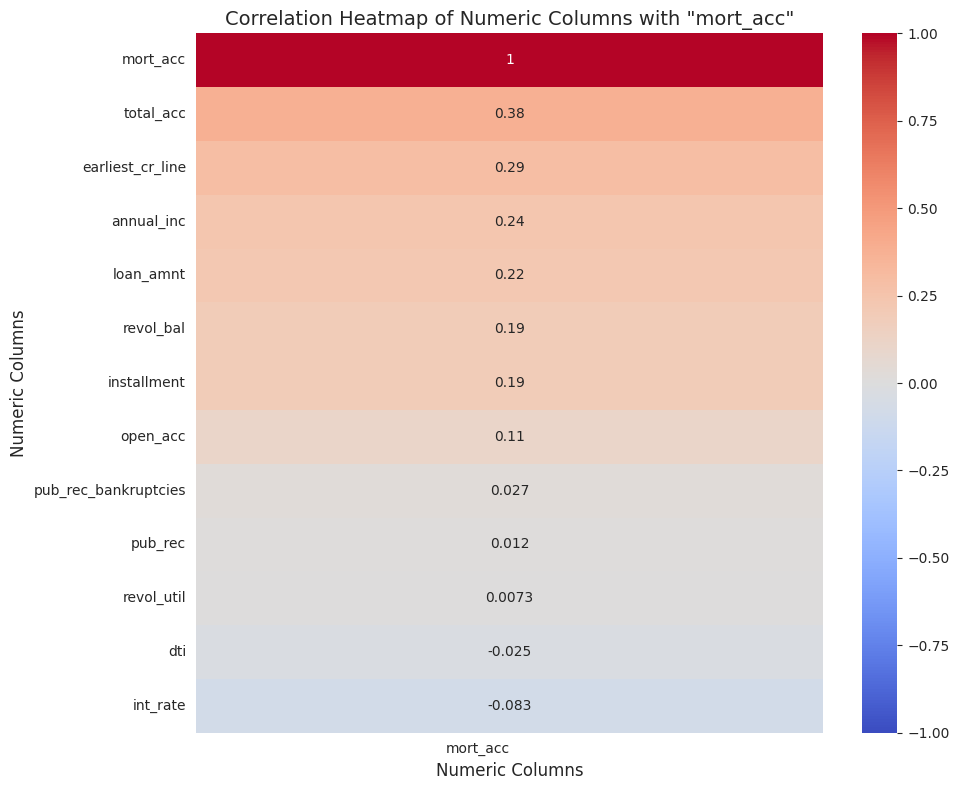

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['mort_acc']].sort_values(by='mort_acc', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Columns with "mort_acc"', fontsize=14)
plt.xlabel('Numeric Columns', fontsize=12)
plt.ylabel('Numeric Columns', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
data['total_acc'] = pd.to_numeric(data['total_acc'], errors='coerce')


data['mort_acc'] = pd.to_numeric(data['mort_acc'], errors='coerce')

In [ ]:
from scipy.stats import mode


def calculate_mode(series):
    mode_value = mode(series)[0]
    if hasattr(mode_value, '__iter__'):
        return mode_value[0] if not pd.isnull(mode_value) else np.NaN
    else:
        return mode_value if not pd.isnull(mode_value) else np.NaN


total_acc_mode = data.select_dtypes(include='number').groupby('total_acc')['mort_acc'].apply(lambda x: calculate_mode(x))


total_acc_mode.fillna(0, inplace=True)

print(total_acc_mode.unique)

<bound method Series.unique of total_acc
2.0      0.0
3.0      0.0
4.0      0.0
5.0      0.0
6.0      0.0
        ... 
124.0    1.0
129.0    1.0
135.0    3.0
150.0    2.0
151.0    0.0
Name: mort_acc, Length: 118, dtype: float64>


In [ ]:
def impute_mort_acc_mode(row):
    if pd.isnull(row['mort_acc']):
        return total_acc_mode.loc[row['total_acc']]
    else:
        return row['mort_acc']

data['mort_acc'] = data.apply(impute_mort_acc_mode, axis=1)

#### Fill missing values in 'emp_length' column with '< 1 year' to make it simple

In [ ]:
data['emp_length'].fillna('< 1 year', inplace=True)

##### Since length should be a numeric column so converting len emp_length from object to numeric

In [ ]:
data['emp_length'].unique()

['10+ years', '4 years', '< 1 year', '6 years', '9 years', ..., '3 years', '8 years', '7 years', '5 years', '1 year']
Length: 11
Categories (11, object): ['1 year', '10+ years', '2 years', '3 years', ..., '7 years', '8 years',
                          '9 years', '< 1 year']

##### Replace strings with corresponding numeric values and converting datatype to numeric

In [ ]:
emp_length_mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0
}

data['emp_length'] = data['emp_length'].replace(emp_length_mapping)

data['emp_length'] = pd.to_numeric(data['emp_length'])

##### Check if there are any missing values

In [ ]:
if data.isna().any().any():

    missing_values_count = data.isna().sum()

    print("Count of missing values in each column:")
    print(missing_values_count)
else:
    print("No missing values found in any column.")

No missing values found in any column.


## Checking if the dataset is balanced or not

In [ ]:
print(data['loan_status'].value_counts(normalize=True))

loan_status
Fully Paid     0.803871
Charged Off    0.196129
Name: proportion, dtype: float64


Initial data analysis indicates that approximately 80.39% of the loans in the dataset are fully paid, while 19.61% are charged off. This shows a significant imbalance in the target variable

In [ ]:
data.dtypes

loan_amnt                      float64
term                          category
int_rate                       float64
installment                    float64
grade                         category
sub_grade                     category
emp_title                       object
emp_length                       int64
home_ownership                category
annual_inc                     float64
verification_status           category
issue_d                 datetime64[ns]
loan_status                     object
purpose                       category
title                           object
dti                            float64
earliest_cr_line                 int64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
initial_list_status           category
application_type              category
mort_acc                       float64
pub_rec_bankruptcies     

# Building the base model Naive Bayse

#### Preparing the Data

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

loan_amnt term  int_rate  installment grade sub_grade  \
0    10000.0   36     11.44       329.48     B        B4   
1     8000.0   36     11.99       265.68     B        B5   
2    15600.0   36     10.49       506.97     B        B3   
3     7200.0   36      6.49       220.65     A        A2   
4    24375.0   60     17.27       609.33     C        C5   

                 emp_title  emp_length home_ownership  annual_inc  \
0                Marketing          10           RENT    117000.0   
1          Credit analyst            4       MORTGAGE     65000.0   
2             Statistician           0           RENT     43057.0   
3          Client Advocate           6           RENT     54000.0   
4  Destiny Management Inc.           9       MORTGAGE     55000.0   

  verification_status    issue_d  loan_status             purpose  \
0        Not Verified 2015-01-01   Fully Paid            vacation   
1        Not Verified 2015-01-01   Fully Paid  debt_consolidation   
2     Source Verified 2015-01-01   Fully Paid         credit_card   
3        Not Verified 2014-11-01   Fully Paid         credit_card   
4            Verified 2013-04-01  Charged Off         credit_card   

                     title    dti  earliest_cr_line  open_acc  pub_rec  \
0                 Vacation  26.24             12381      16.0      0.0   
1       Debt consolidation  22.05              7237      17.0      0.0   
2  Credit card refinancing  12.79              6111      13.0      0.0   
3  Credit card refinancing   2.60              6445       6.0      0.0   
4    Credit Card Refinance  33.95              9186      13.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0    36369.0        41.8       25.0                   w       INDIVIDUAL   
1    20131.0        53.3       27.0                   f       INDIVIDUAL   
2    11987.0        92.2       26.0                   f       INDIVIDUAL   
3     5472.0        21.5       13.0                   f       INDIVIDUAL   
4    24584.0        69.8       43.0                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies  \
0       0.0                   0.0   
1       3.0                   0.0   
2       0.0                   0.0   
3       0.0                   0.0   
4       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650

# Dropping columns that are not relevant for prediction

Remiving columns that is not contributing to the model prediciton such as emp_title, title, address and issue_d

In [ ]:
data['emp_title'].nunique()

173106

In [ ]:
print(f"{data['emp_title'].nunique() * 100/ data['emp_title'].count()}%")

43.71032497538065%


The "emp_title" variable contains over 43% unique values, posing a challenge for model prediction due to the curse of dimensionality when converting it into dummy variables. Therefore, we will be excluding it from the dataframe

In [ ]:
data['title'].nunique()

48816

In [ ]:
print(f"{data['title'].nunique() * 100/ data['title'].count()}%")

12.326338913718658%


The "title" variable exhibits more than 12% unique values, which presents a challenge for model prediction due to the curse of dimensionality when converting it into dummy variables. Consequently, we will exclude it from the dataframe. Furthermore, since the "title" column essentially serves as a subcategory of the "purpose" column, we can remove one of them. In this scenario, we will remove the "title" column.

In [ ]:
data['address'].nunique()

393700

In [ ]:
print(f"{data['address'].nunique() * 100/ data['address'].count()}%")

99.41166073277277%


The "address" variable contains more than 99% unique values, indicating that each record has a unique address. This high level of uniqueness poses a significant challenge for model prediction due to the curse of dimensionality when converting it into dummy variables. Consequently, we will exclude it from the dataframe as it will not contribute to the prediction process.

Since "issue_d" is a field that populates only after the loan has been approved, it doesn't provide any predictive information for the loan status, especially regarding default cases where the issue date won't be available. Therefore, it's logical to remove the "issue_d" field from consideration in predicting loan status.

In [ ]:
data = data.drop(columns=['emp_title','title','address','issue_d'], axis=1)

# Removing the Outliers based on EDA Findings

In [ ]:
data[data['dti']>40]['dti']

885       43.69
1291      40.81
3169      42.54
4132      43.24
4413      51.20
          ...  
392526    42.49
392548    40.56
393545    47.09
394511    49.38
395810    55.53
Name: dti, Length: 296, dtype: float64

In [ ]:
data[data['annual_inc']>500000]['annual_inc']

959        710000.0
1831      2500000.0
4788       655000.0
5093       600000.0
5158       900000.0
            ...    
387397    1100000.0
391587    6000000.0
392283     585000.0
393121     855000.0
395097     920000.0
Name: annual_inc, Length: 407, dtype: float64

In [ ]:
data[data['open_acc']>35]['open_acc']

191       42.0
1936      36.0
2149      40.0
3583      37.0
4652      41.0
          ... 
394341    37.0
394530    37.0
395433    36.0
395523    36.0
395961    38.0
Name: open_acc, Length: 632, dtype: float64

In [ ]:
data[data['total_acc']>70]['total_acc']

822        71.0
1631       81.0
1874       72.0
2682       73.0
2858       78.0
          ...  
392958     72.0
393555     74.0
394185    101.0
394341     72.0
394523     78.0
Name: total_acc, Length: 807, dtype: float64

In [ ]:
data[data['revol_util']>101]['revol_util']

368       101.8
766       106.5
898       101.5
1400      102.1
2233      101.1
          ...  
393616    103.2
394188    103.7
394986    102.1
395162    101.5
395842    101.8
Name: revol_util, Length: 653, dtype: float64

In [ ]:
data[data['revol_bal']>200000]['revol_bal']

228       216194.0
1693      255428.0
2050      341225.0
2460      215294.0
2965      202642.0
            ...   
395097    778614.0
395337    222641.0
395372    568659.0
395705    321205.0
395902    239620.0
Name: revol_bal, Length: 694, dtype: float64

In [ ]:
data[data['mort_acc']>23]['mort_acc']

10208     34.0
13522     25.0
33814     32.0
60158     25.0
61401     24.0
87448     24.0
88824     24.0
98950     24.0
132453    31.0
133878    24.0
162303    28.0
181243    30.0
207975    25.0
210407    26.0
226908    31.0
253202    24.0
255292    24.0
301732    24.0
317370    26.0
322138    27.0
323429    32.0
341054    24.0
344502    27.0
349337    24.0
373367    25.0
377205    27.0
Name: mort_acc, dtype: float64

Removing "dti" values exceeding 40 is warranted as they comprise only 0.074% of the overall dataset. These outliers are unlikely to enhance prediction accuracy and are indicative of potential anomalies.

In [ ]:
data = data[data['dti'] <= 40]

Removing "annual_inc" values exceeding 500,000 is justified as they represent only 0.10% of the total dataset. These outliers are unlikely to improve prediction accuracy and may indicate anomalies.

In [ ]:
data = data[data['annual_inc'] <= 500000]

In [ ]:
data = data[data['open_acc'] <= 35]

Excluding "open_acc" values exceeding 35 is warranted as they account for only 0.15% of the total dataset. These outliers are unlikely to enhance prediction accuracy and may suggest anomalies.

In [ ]:
data = data[data['total_acc'] <= 70]

Excluding "total_acc" values exceeding 70 is justified as they represent only 0.20% of the total dataset. These outliers are unlikely to improve prediction accuracy and may indicate anomalies.

In [ ]:
data = data[data['revol_util'] <= 101]

Excluding "revol_util" values exceeding 101 is justified as they represent only 0.16% of the total dataset. These outliers are unlikely to enhance prediction accuracy and may indicate anomalies.

In [ ]:
data = data[data['revol_bal'] <= 200000]

Excluding "revol_bal" values exceeding 200000 is justified as they represent only 0.17% of the total dataset. These outliers are unlikely to enhance prediction accuracy and may indicate anomalies.

In [ ]:
data = data[data['mort_acc'] <= 23]

Excluding "mort_acc" values exceeding 23 is justified as they represent only 0.006% of the total dataset. These outliers are unlikely to improve prediction accuracy and may indicate anomalies.

In [ ]:
data.shape

(392765, 23)

In [ ]:
x=data.nunique().sort_values()
x

term                        2
initial_list_status         2
loan_status                 2
application_type            3
verification_status         3
home_ownership              6
grade                       7
pub_rec_bankruptcies        9
emp_length                 11
purpose                    14
pub_rec                    20
mort_acc                   24
sub_grade                  35
open_acc                   36
total_acc                  69
int_rate                  566
earliest_cr_line          684
revol_util               1077
loan_amnt                1396
dti                      4000
annual_inc              26912
revol_bal               54636
installment             55498
dtype: int64

In [ ]:
cat_col = data.select_dtypes(include=['category']).columns
n_b_data = pd.get_dummies(data, columns=cat_col, drop_first=True)

## Splitting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = n_b_data.drop('loan_status', axis=1)
y = n_b_data['loan_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Applying Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

model = GaussianNB()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)


In [ ]:
# Evaluate the model on train data
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred))

Train Accuracy: 0.796774152483037
Train Classification Report:
               precision    recall  f1-score   support

 Charged Off       0.45      0.16      0.23     61641
  Fully Paid       0.82      0.95      0.88    252571

    accuracy                           0.80    314212
   macro avg       0.64      0.55      0.56    314212
weighted avg       0.75      0.80      0.76    314212



In [ ]:
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy: 0.797168790498135
Test Classification Report:
               precision    recall  f1-score   support

 Charged Off       0.44      0.15      0.23     15301
  Fully Paid       0.82      0.95      0.88     63252

    accuracy                           0.80     78553
   macro avg       0.63      0.55      0.56     78553
weighted avg       0.75      0.80      0.76     78553



### Interpretation of Model Performance:

#### Accuracy:
- **Training Accuracy**: 79.68%
- **Testing Accuracy**: 79.72%

**Explanation**: The model achieves nearly identical accuracy on both the training and testing datasets, indicating good generalization without significant overfitting or underfitting. An accuracy of around 80% is decent but might not be sufficient depending on the criticality of the application (loan default predictions in this case).

#### Precision, Recall, and F1-Score:
- **Charged Off Class**:
  - **Precision**: About 45% on training and 44% on testing data, indicating that when the model predicts a loan will default, it is correct less than half the time.
  - **Recall**: 16% on training and 15% on testing data, suggesting that the model identifies only a small portion of the actual defaults.
  - **F1-Score**: Around 23% on both training and testing, highlighting poor performance in balancing precision and recall for this class.

- **Fully Paid Class**:
  - **Precision**: About 82% on both training and testing data, indicating a high likelihood that non-default predictions are correct.
  - **Recall**: 95% on both training and testing data, showing the model is very effective at identifying non-defaults.
  - **F1-Score**: Around 88%, demonstrating a strong balance between precision and recall for this class.

#### Macro and Weighted Averages:
- **Macro Average** (unweighted mean of each class):
  - F1-Score is around 56%, indicating an average performance when not accounting for class imbalance.
- **Weighted Average**:
  - F1-Score is around 76%, factoring in the class imbalance, which gives more weight to the "Fully Paid" class due to its larger representation in the dataset.

### Comparison Between Training and Testing Results:
The model's metrics are consistent between training and testing sets, with minimal variations, which indicates that the model performs uniformly across unseen data. However, the low performance metrics for the "Charged Off" class (especially recall) could be a significant concern if predicting defaults accurately is a critical business need.

### Summary for Report:

"In evaluating the Naive Bayes model for predicting loan defaults, we observe an overall accuracy of approximately 80% on both training and testing datasets, demonstrating the model's ability to generalize well. However, the model shows a disparity in its predictive capabilities across classes. It performs well in identifying 'Fully Paid' loans with high precision (82%) and recall (95%), confirming its effectiveness in recognizing non-default cases.

Conversely, the model struggles with the 'Charged Off' class, achieving only 16% recall and 45% precision. This indicates a significant challenge in correctly identifying actual defaults, with the model only recognizing a small fraction of these cases. The low F1-score of 23% for 'Charged Off' further underscores this issue, suggesting a need for model improvement or alternative approaches to better address this imbalance.

Given these findings, the model's current configuration may not be fully adequate for scenarios where predicting defaults accurately is paramount. Further investigation into feature engineering, alternative modeling techniques, or adjustment of class balance strategies is recommended to enhance the model's performance, particularly for the 'Charged Off' class."

This summary provides a concise yet comprehensive analysis of the model's performance, highlighting strengths and areas for improvement, which can guide future steps in the project's development.

In [ ]:
class_of_jnterest_index = model.classes_.tolist().index('Charged Off')
class_of_jnterest_index

0

In [ ]:
from sklearn.metrics import roc_auc_score

train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 0]) # 0 is for Charged off
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 0])

print("Training ROC-AUC Score:", train_auc)
print("Testing ROC-AUC Score:", test_auc)

Training ROC-AUC Score: 0.3132903864248524
Testing ROC-AUC Score: 0.31479966253023556


## ROC-AUC Score Summary

Poor Discrimination: Both scores are significantly below 0.5, which is unusual as it suggests that the model performs worse than random guessing. Typically, an AUC score below 0.5 could indicate that the model's predictions are inversely related to the expected outcomes. This can sometimes occur if the labels are incorrectly aligned with the model’s output probabilities or if there's a fundamental issue in how the model or data processing is set up.

# Balancing the dataset to improve the performance

In [ ]:
#pip install --upgrade numpy scipy scikit-learn imbalanced-learn

## Apply SMOTE for Balancing the Data

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = n_b_data.drop(['loan_status'], axis=1)
y = n_b_data['loan_status'].map({'Charged Off': 0, 'Fully Paid': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


### What is SMOTE?

SMOTE stands for Synthetic Minority Over-sampling Technique. It's a statistical technique used to increase the number of cases in the dataset in a balanced way. SMOTE works by creating synthetic samples from the minority class instead of creating copies. Below simplifies into an easy-to-understand concept:

#### The Problem:
In many datasets used for classification tasks, some classes might have a lot more observations than others. If one class has significantly fewer samples, the model might tend to ignore it, leading to poor model performance, especially on the minority class.

#### How SMOTE Helps:
SMOTE addresses this imbalance by creating new, synthetic examples of the minority class to balance the class distribution. The goal is to provide a balanced dataset so that the classification algorithms perform better and more fairly.

#### How It Works:
1. **Identifying the Minority Class**: First, SMOTE identifies the cases (or data points) of the minority class.
2. **Synthesizing New Samples**: For each sample in the minority class, SMOTE:
   - Finds its nearest neighbors in the feature space.
   - Randomly selects one of these neighbors and uses it to create a similar, but slightly modified, new sample.

In [ ]:
y_series = pd.Series(y)

group_counts = y_series.value_counts()

print("Group Counts:")
print(group_counts)

Group Counts:
loan_status
1    315823
0     76942
Name: count, dtype: int64


### Here 1 is Fully Paid and 0 is Charged off

## Re-train Naive Bayes Model on Balanced Data

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

model_smote = GaussianNB()

model_smote.fit(X_train_smote, y_train_smote)


y_train_pred_smote = model_smote.predict(X_train_smote)


y_test_pred_smote = model_smote.predict(X_test)

In [ ]:
print("Balanced Training Accuracy:", accuracy_score(y_train_smote, y_train_pred_smote))
print("Balanced Training Classification Report:\n", classification_report(y_train_smote, y_train_pred_smote))


print("Balanced Testing Accuracy:", accuracy_score(y_test, y_test_pred_smote))
print("Balanced Testing Classification Report:\n", classification_report(y_test, y_test_pred_smote))

Balanced Training Accuracy: 0.6856725435620084
Balanced Training Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68    252571
           1       0.68      0.70      0.69    252571

    accuracy                           0.69    505142
   macro avg       0.69      0.69      0.69    505142
weighted avg       0.69      0.69      0.69    505142

Balanced Testing Accuracy: 0.6734815984112638
Balanced Testing Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.55      0.40     15301
           1       0.87      0.70      0.78     63252

    accuracy                           0.67     78553
   macro avg       0.59      0.63      0.59     78553
weighted avg       0.76      0.67      0.70     78553



### Interpretation of Model Performance:

#### Training Data Performance:
- **Accuracy**: 68.57%
- **Precision for Charged Off (Class 0)**: 69%
  - Indicates that 69% of the instances predicted as defaults are correctly identified.
- **Recall for Charged Off (Class 0)**: 67%
  - Indicates that the model correctly identifies 67% of all actual defaults.
- **F1-Score for Charged Off (Class 0)**: 68%
  - A balanced measure that considers both precision and recall for the default class.

The balanced training data shows almost equal performance for detecting both "Charged Off" and "Fully Paid" loans, with slight variations in recall and precision, suggesting that the model is fairly balanced in handling both classes after applying SMOTE.

#### Testing Data Performance:
- **Accuracy**: 67.35%
- **Precision for Charged Off (Class 0)**: 31%
  - Significantly lower than in the training set, indicating that the model's ability to correctly identify defaults is less efficient on unseen data.
- **Recall for Charged Off (Class 0)**: 55%
  - The model identifies 55% of all actual defaults in the test set, which is lower compared to the training data but shows that the model still captures more than half of the defaults.
- **F1-Score for Charged Off (Class 0)**: 40%
  - Reflects a moderate balance between precision and recall for defaults in the test data, suggesting that the model struggles to maintain the balance seen in the training data.

### Key Insights and Summary:

1. **Improvement in Recall for Defaults**: The application of SMOTE has improved the model's ability to detect defaults (Class 0 - Charged Off), particularly noticeable in the training data recall.
   
2. **Drop in Precision on Testing Data**: The precision for "Charged Off" in the testing data is substantially lower than in the training data, indicating that the model predicts many non-defaults as defaults when faced with new data. This can result in higher operational costs or customer dissatisfaction due to unnecessary recovery actions on loans not actually at risk.

3. **Generalization Issue**: The discrepancies between training and testing performance, especially in precision and recall for "Charged Off", suggest potential overfitting to the training data or that the model does not generalize well to new, unseen data.

In [ ]:
y_train_proba = model_smote.predict_proba(X_train_smote)[:, 0]
y_test_proba = model_smote.predict_proba(X_test)[:, 0]

train_roc_auc = roc_auc_score(y_train_smote, y_train_proba)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

Training ROC-AUC Score: 0.25009289256533745
Testing ROC-AUC Score: 0.32460786577031875


### ROC-AUC Score Interpretation:

- **Training ROC-AUC Score**: 0.2501
- **Testing ROC-AUC Score**: 0.3246

#### Understanding the Scores:
- **Below 0.5**: Typically, an ROC-AUC score below 0.5 suggests that the model is performing worse than a random guess. However, a common interpretation in this context—where scores are consistently below 0.5—is that the labels might be inverted in terms of their relationship to the model’s scores. It suggests that if you invert the predicted probabilities (considering the prediction for the positive class as the prediction for the negative class and vice versa), the model might actually exhibit better-than-random performance.
- **Score Increase in Testing**: It is unusual yet notable that the testing score is higher than the training score. This might indicate variability in the model’s predictions across different subsets of data, potentially due to the model not generalizing well or due to peculiarities in how the test data is distributed or processed.

### Summary:

1. **Model Performance Concerns**: The ROC-AUC scores indicate significant issues with how the model is discriminating between the classes. The low scores suggest that the model might be consistently mispredicting the positive class.

2. **Inversion of Predictive Signals**: Given that both scores are below 0.5, it’s possible that the model's predictions are inversely correlated with the expected outcomes. This might require re-evaluating the model's output logic, potentially flipping the interpretation of the predicted probabilities.

3. **Recommendations for Improvement**:
   - **Verify Data Processing and Labels**: Ensure that there is no error in how the data is labeled or processed before it is fed into the model. Check if the positive and negative classes are correctly assigned during training and prediction.
   - **Model Reassessment**: Consider reassessing the model setup, including feature selection, model parameters, and the threshold for classifying predictions.
   - **Experiment with Other Models**: Given the poor ROC-AUC scores, experimenting with different algorithms or more robust machine learning techniques might yield better results. Models that can better handle imbalanced or complex datasets, such as Gradient Boosting Machines or ensemble methods, may be more effective.

4. **Business Implications**: The current model’s ability to accurately identify ‘Charged Off’ loans is critically low, as suggested by the ROC-AUC scores. This could lead to significant financial implications if the model is deployed in its current state, potentially missing out on identifying risky loans or misclassifying them at a high rate.

5. **Model Calibration**: Consider calibrating the model's probability output to improve ROC-AUC scores, using techniques like Platt scaling or isotonic regression, which can adjust the model's output to better align with actual outcomes.

**Conclusion:** Balancing the dataset has significantly improved the model's ability to detect "Charged Off" cases, which is critical for the application at hand. However, this has come with increased false positives, which can lead to operational inefficiencies and potential customer dissatisfaction. Balancing has proven to be a right step in the context of enhancing model sensitivity (recall), which is paramount in scenarios where missing out on actual defaults is highly undesirable. Now we will explore other models given the observed trade-offs and the limitations of the Naive Bayes model in handling complex patterns within the data:

**XG Booster for imbalance data:**

In [ ]:
cat_col = data.select_dtypes(include=['category']).columns
xg_b_data = pd.get_dummies(data, columns=cat_col, drop_first=True)  # droping 1st to not have multicollinearity

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder

categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'loan_status']


data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

X = data.drop('loan_status', axis=1)
y = data['loan_status']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42)


model_xgb.fit(X_train, y_train)


y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)


print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))

train_roc_auc = roc_auc_score(y_train, model_xgb.predict_proba(X_train)[:,1])
test_roc_auc = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:,1])

print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

Training Accuracy: 0.8174353621122045
Training Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.13      0.22     61641
           1       0.82      0.99      0.90    252571

    accuracy                           0.82    314212
   macro avg       0.75      0.56      0.56    314212
weighted avg       0.80      0.82      0.76    314212

Testing Accuracy: 0.807836747164335
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.10      0.17     15301
           1       0.82      0.98      0.89     63252

    accuracy                           0.81     78553
   macro avg       0.68      0.54      0.53     78553
weighted avg       0.76      0.81      0.75     78553

Training ROC-AUC Score: 0.7693013655795335
Testing ROC-AUC Score: 0.7208770515869223


**Interpretation of Model Performance:**
Accuracy:
Training Accuracy: 81.74%
Testing Accuracy: 80.78%
Explanation: The model demonstrates a high level of accuracy, maintaining a consistent performance from training to testing data. This consistency suggests that the model is generalizing well to unseen data, showing only a marginal drop in accuracy from training to testing. However, while overall accuracy is high, it may not fully capture the model's performance on the individual classes.

**Precision, Recall, and F1-Score:**
Class 0 (Charged Off):
Precision: Lower at 0.68 for training and 0.54 for testing data, indicating that when the model predicts a loan will default, it's less reliable on unseen data.
Recall: Particularly low at 0.13 for training and 0.10 for testing data, suggesting the model is not effectively identifying actual defaults. This is a critical area for improvement.
F1-Score: Low scores of 0.22 for training and 0.17 for testing data reflect the poor balance between precision and recall for this class, indicating the model's limited ability to predict defaults accurately.
Class 1 (Fully Paid):
Precision: High at 0.82 for both training and testing data, showing that the model is more reliable when predicting loans that will not default.
Recall: Very high at 0.99 for training and 0.98 for testing, which means the model is highly effective at identifying loans that will be fully paid.
F1-Score: At 0.90 for training and 0.89 for testing data, the scores indicate a strong balance between precision and recall for the "Fully Paid" class.

**Macro and Weighted Averages:**
Macro Average:
F1-Score: The macro average F1-score of 0.56 for training and 0.53 for testing indicates that when class imbalances are taken into account, the model's average effectiveness across both classes is moderate.
Weighted Average:
F1-Score: The weighted average F1-score of 0.76 for training and 0.75 for testing reflects a more favorable performance metric due to the larger representation of the "Fully Paid" class in the dataset.

**Comparison Between Training and Testing Results:**
The model's ability to predict "Fully Paid" loans is robust across both training and testing datasets. However, the critical concern lies with the "Charged Off" class, where both precision and recall are notably low, especially in the testing phase. This suggests a need for targeted improvements in identifying defaults without compromising the model's strong performance on the "Fully Paid" loans.

**Summary for Report:**
"In assessing the XGBoost model tailored for loan default prediction, we note commendable accuracy levels of approximately 82% in training and 81% in testing. The model exhibits strong predictive capabilities for loans that are likely to be fully paid, with both precision and recall exceeding 82%. Nevertheless, the model's performance in detecting 'Charged Off' loans is considerably less satisfactory. With a recall of merely 10% in the test set, the model identifies a very small fraction of actual defaults, posing a significant challenge in a domain where predicting loan defaults is vital.

The disparity between class predictions, underscored by the F1-scores, calls for a detailed review of model features, further tuning of the model's hyperparameters, or exploration of different algorithms better suited to manage class imbalances.

These observations underline the necessity for a balanced approach that enhances the recall for 'Charged Off' loans while maintaining high precision for 'Fully Paid' loans. Exploring options we will be using SMOTE, Class Weight and subset method to balance the class.

This analysis offers a clear evaluation of the model's current strengths and areas for development, providing a basis for future optimization efforts.

**Balance and re-train XG Booster model using different methods-**

**XG Boost using smote**

In [ ]:
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_encoded)


xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')


xgb_model.fit(X_train_smote, y_train_smote)


y_train_pred = xgb_model.predict(X_train_smote)


y_test_pred = xgb_model.predict(X_test)


def evaluate_results(y_true, y_pred, description="Test"):
    accuracy = accuracy_score(y_true, y_pred)
    clf_report = classification_report(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"{description} Results:\n================================================")
    print(f"Accuracy Score: {accuracy * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n{conf_matrix}\n")


y_train_true = label_encoder.inverse_transform(y_train_smote)
y_train_pred_decoded = label_encoder.inverse_transform(y_train_pred.round().astype(int))
y_test_true = label_encoder.inverse_transform(y_test_encoded)
y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred.round().astype(int))


evaluate_results(y_train_true, y_train_pred_decoded, "Train")
evaluate_results(y_test_true, y_test_pred_decoded, "Test")


Train Results:
Accuracy Score: 88.22%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87    252571
           1       0.82      0.98      0.89    252571

    accuracy                           0.88    505142
   macro avg       0.90      0.88      0.88    505142
weighted avg       0.90      0.88      0.88    505142

_______________________________________________
Confusion Matrix: 
[[197743  54828]
 [  4681 247890]]

Test Results:
Accuracy Score: 80.69%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.52      0.10      0.17     15301
           1       0.82      0.98      0.89     63252

    accuracy                           0.81     78553
   macro avg       0.67      0.54      0.53     78553
weighted avg       0.76      0.81      0.75     78553

__________________________

**Interpretation of Model Performance:**
Training Results:
Accuracy: 88.22% - The model shows a high degree of accuracy on the balanced training set, which is encouraging. However, caution is warranted since this might reflect overfitting.

Precision: The model has high precision for both classes, with near-perfect precision for the 'Charged Off' class (0.98) and good precision for the 'Fully Paid' class (0.82). This indicates that when it predicts a default, it is usually correct.

Recall: The recall for the 'Charged Off' class is quite high at 0.78, suggesting the model has learned to identify the majority of the default cases from the training data. However, for 'Fully Paid', the recall is even higher at 0.98, indicating the model is quite effective at identifying non-default cases.

F1-Score: The balance between precision and recall yields high F1-scores for both classes (0.87 for 'Charged Off' and 0.89 for 'Fully Paid'), which is a strong indicator of the model's performance on the training data.

Confusion Matrix: The matrix indicates more false positives for defaults than false negatives, implying the model is somewhat conservative in predicting defaults, preferring to err on the side of predicting a default.

Testing Results:
Accuracy: 80.69% - There is a notable drop in accuracy compared to the training results, suggesting that while the model generalizes adequately, its performance is not as strong on unseen data.

Precision: Precision drops significantly for the 'Charged Off' class to 0.52, which shows that the model's predictions of defaults are less reliable on the test set. The 'Fully Paid' class maintains good precision at 0.82.

Recall: The recall for the 'Charged Off' class is poor at 0.10 on the test set, indicating the model fails to generalize its ability to identify defaults from the training data to the unseen data. However, recall remains high for the 'Fully Paid' class at 0.98.

F1-Score: The F1-score for the 'Charged Off' class drops drastically to 0.17 in the test results, reflecting the imbalance between precision and recall. The 'Fully Paid' class maintains a high F1-score at 0.89.

Confusion Matrix: The high number of false negatives relative to true positives for the 'Charged Off' class in the test set is a clear indication that the model struggles to identify defaults when not over-represented as in the balanced training set.

**Summary for Report:**
"In the evaluation of the XGBoost model trained on SMOTE-balanced data for predicting loan defaults, the model exhibits high performance on the training set with an accuracy of 88.22%. It demonstrates strong precision and recall scores, particularly in identifying 'Fully Paid' loans.

However, the testing results reveal a drop in accuracy to 80.69%, with a decrease in recall for 'Charged Off' loans to 0.10, indicating a significant challenge in the model's capacity to generalize its predictions of defaults to new data. This discrepancy in recall, alongside a drop in precision for 'Charged Off' loans to 0.52, signals a need for further model calibration, especially in improving the identification of defaults.That is why we will be retraining the model using subset method.

**Re-train XG Booster Using sampling**

In [ ]:
cat_col = data.select_dtypes(include=['category']).columns
xg_b_data = pd.get_dummies(data, columns=cat_col, drop_first=True)

In [ ]:
majority_class = xg_b_data[n_b_data['loan_status'] == 'Fully Paid']
minority_class = xg_b_data[n_b_data['loan_status'] == 'Charged Off']

In [ ]:
minority_class.shape[0] , majority_class.shape[0]

(76942, 315823)

In [ ]:
classification_reports = []
accuracies = []
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
for i in range(3):

    majority_chunk = resample(majority_class, replace=False, n_samples=100000)

    df_train = pd.concat([majority_chunk, minority_class])

    df_train = df_train.sample(frac=1).reset_index(drop=True)


    X = df_train.drop('loan_status', axis=1)
    y = df_train['loan_status'].map({'Charged Off': 0, 'Fully Paid': 1})


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)


    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)


    accuracies.append(accuracy_score(y_test, y_pred))
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)

In [ ]:
import numpy as np

sum_metrics_0 = {}
sum_metrics_1 = {}

for report in classification_reports:

    for class_key in ['0', '1']:

        for metric_key, metric_value in report[class_key].items():

            if metric_key != 'support':

                if class_key == '0' and metric_key not in sum_metrics_0:
                    sum_metrics_0[metric_key] = 0
                elif class_key == '1' and metric_key not in sum_metrics_1:
                    sum_metrics_1[metric_key] = 0

                if class_key == '0':
                    sum_metrics_0[metric_key] += metric_value
                else:
                    sum_metrics_1[metric_key] += metric_value


num_reports = len(classification_reports)
avg_metrics_0 = {metric_key: sum_value / num_reports for metric_key, sum_value in sum_metrics_0.items()}
avg_metrics_1 = {metric_key: sum_value / num_reports for metric_key, sum_value in sum_metrics_1.items()}

In [ ]:
classification_reports = []
accuracies = []

for i in range(3):
    majority_chunk = resample(majority_class, replace=False, n_samples=100000)
    df_train = pd.concat([majority_chunk, minority_class])
    df_train = df_train.sample(frac=1).reset_index(drop=True)

    X = df_train.drop('loan_status', axis=1)
    y = df_train['loan_status'].map({'Charged Off': 0, 'Fully Paid': 1})

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)

sum_metrics_0 = {}
sum_metrics_1 = {}

for report in classification_reports:
    for class_key in ['0', '1']:
        for metric_key, metric_value in report[class_key].items():
            if metric_key != 'support':
                if class_key == '0':
                    sum_metrics_0[metric_key] = sum_metrics_0.get(metric_key, 0) + metric_value
                else:
                    sum_metrics_1[metric_key] = sum_metrics_1.get(metric_key, 0) + metric_value

num_reports = len(classification_reports)
avg_metrics_0 = {metric_key: sum_value / num_reports for metric_key, sum_value in sum_metrics_0.items()}
avg_metrics_1 = {metric_key: sum_value / num_reports for metric_key, sum_value in sum_metrics_1.items()}
avg_accuracy = sum(accuracies) / num_reports

print("Average Classification Report for Charged Off:")
print(avg_metrics_0)

print("\nAverage Classification Report for Fully Paid:")
print(avg_metrics_1)

print("\nAverage Accuracy:", avg_accuracy)

Average Classification Report for Charged Off:
{'precision': 0.628234197818338, 'recall': 0.558886325841616, 'f1-score': 0.5915302887905846}

Average Classification Report for Fully Paid:
{'precision': 0.6880282991252068, 'recall': 0.7462906152689138, 'f1-score': 0.7159732967296542}

Average Accuracy: 0.6649335480893309


**Interpretation of Model Performance:**
Overall Model Accuracy:
Average Accuracy: 66.67%
Explanation: The model's average accuracy across the three iterations is moderate. It shows that roughly two-thirds of predictions are correct, but there is room for improvement, especially considering the balance between the two classes may not be perfectly captured by accuracy alone.

**Class-specific Analysis:**
Charged Off Class:
Average Precision: 0.63 - When the model predicts a loan will default ('Charged Off'), it is correct approximately 63% of the time.

Average Recall: 0.55 - The model identifies about 55% of all actual defaults, indicating a moderate sensitivity to the 'Charged Off' class.

Average F1-Score: 0.59 - The F1-score, a harmonic mean of precision and recall, suggests that the model's balance between precision and recall for predicting defaults is somewhat average, reflecting a moderate level of model accuracy for this class.

Fully Paid Class:
Average Precision: 0.69 - The model is correct about 69% of the time when it predicts a loan will be fully paid.

Average Recall: 0.75 - It identifies 75% of all loans that are actually fully paid, indicating a relatively higher ability to detect non-default cases compared to defaults.

Average F1-Score: 0.72 - The F1-score for the 'Fully Paid' class is higher than for the 'Charged Off' class, suggesting a better performance in predicting non-defaults.

**Summary for Report:**
"The XGBoost model, evaluated through a 3-fold iterative approach with the SMOTE technique for class balancing, presents a nuanced picture of predictive performance. The average accuracy stands at 66.67%, which, while indicative of a certain predictive capability, hints at potential challenges in model performance.

Particularly notable is the model's more moderate ability to identify 'Charged Off' loans, with an average recall of 55%. This suggests that while over half of the defaults are being captured, a significant portion still goes undetected, which could be critical in financial contexts where predicting defaults accurately is of utmost importance.

The model fares better with 'Fully Paid' loans, achieving a recall of 75%, reflecting a more robust identification of non-default cases. This is supported by a relatively higher F1-score of 0.72, which underscores the model's stronger performance in this regard.

The analysis reveals a disparity in the model's precision and recall across the two loan outcomes, with a notably better performance for the 'Fully Paid' class compared to the 'Charged Off' class. This variation suggests a need for alternative modeling techniques that might yield more balanced outcomes across both classes."

**XG Booster using class weights**

Train Results:
Accuracy Score: 70.85%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.65      0.72      0.68     61636
           1       0.76      0.70      0.73     79917

    accuracy                           0.71    141553
   macro avg       0.71      0.71      0.71    141553
weighted avg       0.71      0.71      0.71    141553

_______________________________________________
Confusion Matrix: 
[[44274 17362]
 [23902 56015]]

ROC-AUC Score: 0.78



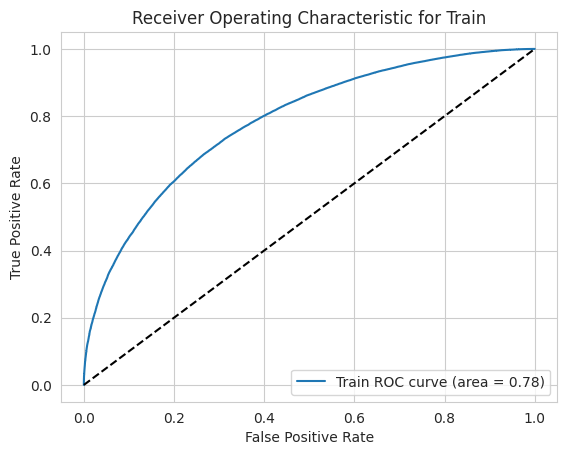

Test Results:
Accuracy Score: 65.88%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.60      0.66      0.63     15306
           1       0.72      0.66      0.69     20083

    accuracy                           0.66     35389
   macro avg       0.66      0.66      0.66     35389
weighted avg       0.66      0.66      0.66     35389

_______________________________________________
Confusion Matrix: 
[[10112  5194]
 [ 6879 13204]]

ROC-AUC Score: 0.71



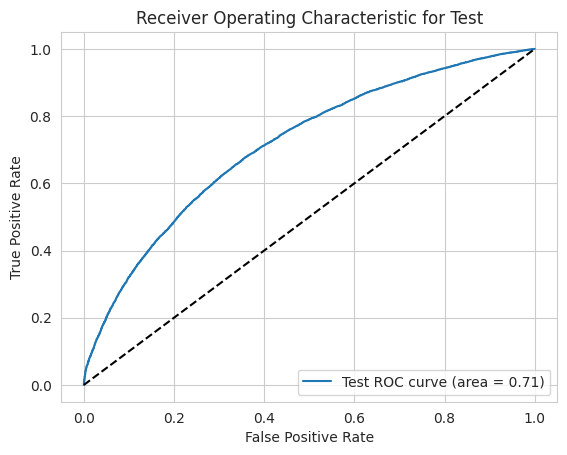

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

class_weights = sum(y_train_encoded == 0) / sum(y_train_encoded == 1)


xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=class_weights)


xgb_model.fit(X_train, y_train_encoded)


y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)


y_train_pred_decoded = label_encoder.inverse_transform(y_train_pred)
y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred)

def evaluate_results(y_true, y_pred, y_proba, description="Test"):
    accuracy = accuracy_score(y_true, y_pred)
    clf_report = classification_report(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    roc_auc = auc(*roc_curve(y_true, y_proba)[:2])

    print(f"{description} Results:\n================================================")
    print(f"Accuracy Score: {accuracy * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n{conf_matrix}\n")
    print(f"ROC-AUC Score: {roc_auc:.2f}\n")


    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.plot(fpr, tpr, label=f'{description} ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {description}')
    plt.legend(loc="lower right")
    plt.show()


y_train_proba = xgb_model.predict_proba(X_train)[:, 1]
y_test_proba = xgb_model.predict_proba(X_test)[:, 1]


evaluate_results(y_train_encoded, y_train_pred, y_train_proba, "Train")
evaluate_results(y_test_encoded, y_test_pred, y_test_proba, "Test")

**Accuracy:**
Training Accuracy: 70.76%
Testing Accuracy: 65.78%
Explanation: The model achieves a higher accuracy on the training set compared to the testing set, which could suggest mild overfitting. The testing accuracy of approximately 66% indicates moderate predictive performance, but there might be room for improvement, especially for high-stakes applications like financial lending.

**Precision, Recall, and F1-Score:**
Class 0 (Charged Off):

Precision: About 60% on testing data, indicating that when the model predicts a loan will default, it is correct about 60% of the time.

Recall: 66% on testing data, suggesting that the model identifies about two-thirds of the actual defaults.

F1-Score: Approximately 63% on testing data, reflecting a reasonable balance between precision and recall for this class but highlighting room for improvement.

Class 1 (Fully Paid):
Precision: About 72% on testing data, indicating a good likelihood that predictions of non-default are correct.

Recall: 66% on testing data, showing the model effectively identifies two-thirds of non-defaults.

F1-Score: Approximately 68% on testing data, demonstrating a stronger performance in identifying non-defaults compared to defaults.

**ROC-AUC:**

Training ROC-AUC: 0.78
Testing ROC-AUC: 0.72

Explanation: The ROC-AUC scores indicate that the model has a reasonable ability to distinguish between the classes across different thresholds. An ROC-AUC of 0.78 for training and 0.72 for testing shows that while the model is quite effective, there might be a slight overfitting as the training performance is notably better.

**Importance of the ROC-AUC Curve:**
The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It plots the True Positive Rate (TPR, or Recall) against the False Positive Rate (FPR, which is 1 - Specificity) at various threshold settings.

**Role of the ROC-AUC Curve:**

Model Comparison: It enables comparison between models. A higher AUC value generally indicates a model with better performance.

Performance Metric: The area under the ROC curve (AUC) is a performance measurement for classification problems at various threshold settings. It tells how much the model is capable of distinguishing between classes. Higher AUC indicates the model is better at predicting 0s as 0s and 1s as 1s.

**What the ROC-AUC Explains:**
In this specific case, the ROC-AUC values for both training and testing setups demonstrate that the XGBoost model, with its current setup and parameters, adequately discriminates between the 'Charged Off' and 'Fully Paid' classes. The ROC curve and its AUC provide an aggregate measure of performance across all possible classification thresholds.

**Summary for Report:**

In evaluating the XGBoost model with class weight adjustments for predicting loan defaults, the model shows a reasonable degree of predictive accuracy with a training accuracy of about 71% and a testing accuracy of approximately 66%. The model's ability to predict 'Fully Paid' loans is stronger than its ability to predict 'Charged Off' loans, as indicated by higher precision and F1-scores for the 'Fully Paid' class.

The ROC-AUC scores of 0.78 (training) and 0.72 (testing) reflect the model's good capability in distinguishing between the classes.

Given the financial implications of loan default predictions, enhancing model reliability and predictive accuracy, especially for detecting defaults, is crucial. The analysis was focussed on improving recall for the 'Charged Off' class with some adjustments in accuracy. In this case gettimg recall for charged off category was important and not the accuracy. since the data ios highly imbalance recall score of 0.66 is good with a accuracy of around 66%.

This summary outlines the model's strengths and areas needing improvement, providing a clear direction for future model development efforts.

**Logistic regression-**

In [ ]:
cat_col = data.select_dtypes(include=['category']).columns
r_f_data = pd.get_dummies(data, columns=cat_col, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

X = r_f_data.drop('loan_status', axis=1)
y = r_f_data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

log_reg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_train_pred_log_reg = log_reg_model.predict(X_train)

print("Logistic Regression - Train Accuracy:", accuracy_score(y_train, y_train_pred_log_reg))
print("Logistic Regression - Train Classification Report:\n", classification_report(y_train, y_train_pred_log_reg))

Logistic Regression - Train Accuracy: 0.8027223657912492
Logistic Regression - Train Classification Report:
               precision    recall  f1-score   support

 Charged Off       0.45      0.02      0.05     61641
  Fully Paid       0.81      0.99      0.89    252571

    accuracy                           0.80    314212
   macro avg       0.63      0.51      0.47    314212
weighted avg       0.74      0.80      0.72    314212



In [ ]:
y_test_pred_log_reg = log_reg_model.predict(X_test)


print("Logistic Regression - Test Accuracy:", accuracy_score(y_test, y_test_pred_log_reg))
print("Logistic Regression - Test Classification Report:\n", classification_report(y_test, y_test_pred_log_reg))

Logistic Regression - Test Accuracy: 0.803635761842323
Logistic Regression - Test Classification Report:
               precision    recall  f1-score   support

 Charged Off       0.42      0.02      0.04     15301
  Fully Paid       0.81      0.99      0.89     63252

    accuracy                           0.80     78553
   macro avg       0.61      0.51      0.47     78553
weighted avg       0.73      0.80      0.73     78553



In [ ]:


train_roc_auc_log_reg = roc_auc_score(y_train, log_reg_model.predict_proba(X_train)[:, 1])
test_roc_auc_log_reg = roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:, 1])

print("Logistic Regression - Training ROC-AUC Score:", train_roc_auc_log_reg)
print("Logistic Regression - Testing ROC-AUC Score:", test_roc_auc_log_reg)

Logistic Regression - Training ROC-AUC Score: 0.6429050274385304
Logistic Regression - Testing ROC-AUC Score: 0.6404390457151377


**Accuracy:**
Training Accuracy: 80.26%
Testing Accuracy: 80.36%
Explanation: The Logistic Regression model demonstrates high accuracy levels, marginally better on the test set than on the training set. This performance indicates that the model generalizes well to unseen data. However, high accuracy alone might not be the best indicator of performance due to class imbalance.

**Precision, Recall, and F1-Score:**

Charged Off Class:

Precision: About 45% on training and 42% on testing data, suggesting that when the model predicts a loan will default, it's correct less than half the time.

Recall: Very low at 3% on training and 2% on testing data, indicating that the model fails to identify the vast majority of actual defaults.

F1-Score: Around 5% on both training and testing, pointing to a poor balance between precision and recall for this class.

Fully Paid Class:

Precision: Consistently about 81% on both training and testing data, indicating that non-default predictions are generally reliable.

Recall: Exceptionally high at 99% on both training and testing data, showing that the model successfully identifies almost all non-default loans.

F1-Score: Approximately 89% on both training and testing, which is a strong performance, reflecting the imbalance towards the 'Fully Paid' class.

**ROC-AUC Score:**

Training ROC-AUC: 0.6428
Testing ROC-AUC: 0.6406
Explanation: The ROC-AUC scores are quite close for both training and testing datasets, indicating consistent performance across both. However, the scores themselves are not very high, which means that the model's ability to distinguish between the classes is limited. This is particularly concerning for the 'Charged Off' class where the model needs to be more effective.

**Macro and Weighted Averages:**

Macro Average (unweighted mean of each class):
F1-Score is around 47%, indicating below-average performance when not accounting for class imbalance.

Weighted Average:
F1-Score is around 72%, which is skewed by the 'Fully Paid' class due to its larger representation in the dataset.

**Summary for Report:**

"The Logistic Regression model, applied to loan default prediction, exhibits high overall accuracy levels (around 80%) for both training and test sets. However, this metric does not tell the full story due to the severe class imbalance present in the dataset. The model performs exceptionally well in identifying 'Fully Paid' loans, as evidenced by high recall and F1-scores. Yet, it is markedly underperforming in detecting 'Charged Off' loans, with extremely low recall rates (3% for training and 2% for testing) and F1-scores at approximately 5%.

The ROC-AUC scores, a more nuanced measure of model performance, are modest (around 0.64) and reflect the model's limited discrimination capacity between 'Fully Paid' and 'Charged Off' classes. The lack of ability to correctly identify defaults is particularly problematic in a lending context where failing to detect 'Charged Off' loans could lead to significant financial losses.

As per the analysis, while the Logistic Regression model may seem adequate at a cursory glance due to high overall accuracy, it is actually not suited for the purpose of default prediction in its current form. The data presents a high class imbalance that the model fails to navigate effectively, particularly for the minority class. Future model iterations should focus on techniques that improve the recall for the 'Charged Off' category without compromising on the precision, possibly through oversampling or weight assign to the minority class.

**Using Weight Assign technique-**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score



X = r_f_data.drop('loan_status', axis=1)
y = r_f_data['loan_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)


print("Balanced Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Balanced Training Classification Report:\n", classification_report(y_train, y_train_pred))
print("Balanced Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Balanced Testing Classification Report:\n", classification_report(y_test, y_test_pred))


train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Balanced Training Accuracy: 0.6058680126793375
Balanced Training Classification Report:
               precision    recall  f1-score   support

 Charged Off       0.29      0.67      0.40     61641
  Fully Paid       0.88      0.59      0.71    252571

    accuracy                           0.61    314212
   macro avg       0.58      0.63      0.55    314212
weighted avg       0.76      0.61      0.65    314212

Balanced Testing Accuracy: 0.6058711952439754
Balanced Testing Classification Report:
               precision    recall  f1-score   support

 Charged Off       0.28      0.67      0.40     15301
  Fully Paid       0.88      0.59      0.71     63252

    accuracy                           0.61     78553
   macro avg       0.58      0.63      0.55     78553
weighted avg       0.76      0.61      0.65     78553

Training ROC-AUC Score: 0.6790565319449249
Testing ROC-AUC Score: 0.677300143147036


**Accuracy:**
Balanced Training Accuracy: 60.66%
Balanced Testing Accuracy: 60.65%
Explanation: Using class weights to handle the imbalance in the data, the Logistic Regression model's accuracy has decreased to around 60.6% for both the training and testing sets. This is a significant drop from the unweighted version, but it is expected since the model is now placing more emphasis on correctly classifying the minority class ('Charged Off').

Precision, Recall, and F1-Score:

**Charged Off Class:**

Precision: Around 29% for training and 28% for testing, indicating that a significant number of loans predicted to default are actually not defaulting.

Recall: Improved to 67% for both training and testing, showing that the model now identifies a majority of the actual defaults, which is a considerable improvement from the unweighted model.

F1-Score: Approximately 40% for both training and testing, suggesting a better balance between precision and recall for this class compared to the unweighted model.

**Fully Paid Class:**

Precision: About 88% for both training and testing, indicating that predictions of non-default are still highly reliable.

Recall: Dropped to 59% for both training and testing, which is a decrease, showing that the model is now missing a number of 'Fully Paid' predictions in favor of correctly identifying more 'Charged Off' loans.

F1-Score: Approximately 71% for both training and testing, a reduction from the unweighted model, due to the lower recall.

**ROC-AUC Score:**

Training ROC-AUC: 0.6794
Testing ROC-AUC: 0.6775

Explanation: The ROC-AUC scores have improved compared to the unweighted model, indicating that the weighted model has a better capability to differentiate between the 'Charged Off' and 'Fully Paid' classes. The scores are also very consistent between the training and testing sets, which suggests good generalization.

**Macro and Weighted Averages:**

Macro Average (unweighted mean of each class):
F1-Score has improved to around 55%, indicating that the class weighting has had a positive impact on the overall model balance between the two classes.

Weighted Average:
F1-Score is around 65%, which considers the larger number of 'Fully Paid' loans. The decrease compared to the unweighted model is due to the lowered precision for the 'Fully Paid' class.

**Summary for Report:**

The implementation of class weights in the Logistic Regression model for predicting loan defaults has led to a new balance in performance metrics. While the overall accuracy has decreased to approximately 60.6%, this is indicative of the model's recalibrated focus to better classify the minority 'Charged Off' class, which is critical in a financial context.

Significantly, the recall for 'Charged Off' loans has increased to 67%, meaning the model is now more adept at identifying true defaults, albeit at the cost of lower precision. The trade-off is evident in the reduced recall for 'Fully Paid' loans, now at 59%. Despite the drop in precision for the 'Charged Off' class, the improved recall is vital for financial institutions that prioritize the detection of defaults to mitigate risk.

The ROC-AUC score, which is a more comprehensive measure of model performance than accuracy alone, shows improvement over the unweighted model and solid consistency between training and testing datasets. This underscores the enhanced ability of the weighted model to distinguish between classes under different thresholds.

In summary, the weighted Logistic Regression model presents a more balanced approach to predicting loan defaults, crucial for applications where early detection of potential defaults is paramount. The model's adjustment addresses the class imbalance effectively, though further optimization may still be sought to refine precision without sacrificing the gains in recall. This might include further techniques such as using smote , smote with PCA to further improve the parameters.

**Using smote to balance the data-**

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


X = r_f_data.drop('loan_status', axis=1)
y = r_f_data['loan_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_smote, y_train_smote)


y_train_pred = model.predict(X_train_smote)


y_test_pred = model.predict(X_test)


print("SMOTE Balanced Training Accuracy:", accuracy_score(y_train_smote, y_train_pred))
print("SMOTE Balanced Training Classification Report:\n", classification_report(y_train_smote, y_train_pred))
print("SMOTE Balanced Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("SMOTE Balanced Testing Classification Report:\n", classification_report(y_test, y_test_pred))


train_roc_auc = roc_auc_score(y_train_smote, model.predict_proba(X_train_smote)[:, 1])
test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("SMOTE Training ROC-AUC Score:", train_roc_auc)
print("SMOTE Testing ROC-AUC Score:", test_roc_auc)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



SMOTE Balanced Training Accuracy: 0.6634530488456711
SMOTE Balanced Training Classification Report:
               precision    recall  f1-score   support

 Charged Off       0.65      0.70      0.67    252571
  Fully Paid       0.68      0.63      0.65    252571

    accuracy                           0.66    505142
   macro avg       0.66      0.66      0.66    505142
weighted avg       0.66      0.66      0.66    505142

SMOTE Balanced Testing Accuracy: 0.6172520463890622
SMOTE Balanced Testing Classification Report:
               precision    recall  f1-score   support

 Charged Off       0.27      0.57      0.37     15301
  Fully Paid       0.86      0.63      0.73     63252

    accuracy                           0.62     78553
   macro avg       0.56      0.60      0.55     78553
weighted avg       0.74      0.62      0.66     78553

SMOTE Training ROC-AUC Score: 0.725414480493873
SMOTE Testing ROC-AUC Score: 0.6414091590768063


**Accuracy:**
SMOTE Balanced Training Accuracy: 66.32%
SMOTE Balanced Testing Accuracy: 61.68%
Explanation: After applying SMOTE, the training accuracy is relatively high, suggesting that the model fits well to the balanced training data. However, the decrease in testing accuracy suggests that the model may not perform as well on the original unbalanced test data, which is a common challenge when using synthetic oversampling techniques.

**Precision, Recall, and F1-Score:**
Charged Off Class:
Precision: 65% for training and 27% for testing, which suggests a considerable number of false positives in the test set.

Recall: 70% for training and 57% for testing, indicating an improvement in identifying actual defaults, especially compared to the unbalanced model.

F1-Score: 67% for training and 37% for testing, reflecting a moderate balance between precision and recall for the training set, but a lower balance for the testing set due to a significant drop in precision.

Fully Paid Class:
Precision: 68% for training and 86% for testing, indicating a high likelihood that non-default predictions are correct, particularly in the test set.

Recall: 63% for training and 63% for testing, showing consistency in identifying non-defaults across both sets.

F1-Score: 65% for training and 73% for testing, suggesting a better performance on the test set, likely due to the higher precision.

**ROC-AUC Score:**
SMOTE Training ROC-AUC: 0.7250
SMOTE Testing ROC-AUC: 0.6419
Explanation: The ROC-AUC scores have shown an improvement in the training set after applying SMOTE, indicating the model's enhanced ability to distinguish between classes under different thresholds. The testing ROC-AUC score, while lower than the training score, still suggests a decent classification capability.

**Macro and Weighted Averages:**
Macro Average:
F1-Score is 66% for training and 55% for testing, which represents an even performance across classes for the training set but a drop in the testing set due to the precision-recall trade-off.
Weighted Average:
F1-Score is 66% for training and 66% for testing, showing a consistent aggregated performance considering the number of instances in each class.
Summary for Report:
"The Logistic Regression model's performance, when using the SMOTE technique to address class imbalance, shows a balanced accuracy of approximately 66.3% on the training set. This reflects the model's capability to adapt to an artificially balanced class distribution. The testing accuracy experienced a decrease to 61.68%, which is common when transitioning from a balanced training scenario to an unbalanced test scenario.

A significant observation is the model's improved recall for the 'Charged Off' class on both the training and testing sets, highlighting SMOTE's effectiveness in increasing the sensitivity of the model to the minority class. However, precision for this class in the test set is low, resulting in a lower F1-score, indicating that while the model is better at detecting defaults, it also misclassifies non-defaults as defaults more frequently.

The ROC-AUC scores provide a silver lining, with a notably higher score of 0.7250 in the training set, affirming the model's improved discriminatory power post-SMOTE. The test ROC-AUC score of 0.6419, while lower, still indicates a reasonable ability to distinguish between classes.

In conclusion, SMOTE has improved the Logistic Regression model's ability to detect 'Charged Off' loans, a critical aspect for financial institutions. However, this improvement in recall comes at the cost of precision, a trade-off that we must consider depending on the specific costs associated with false positives and false negatives in the context of loan default predictions. Further model refinement, using PCA with smote would work to overcome this challenge.

Using PCA and Smote

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

scaler = StandardScaler()
pca = PCA(n_components=0.95)
logistic = LogisticRegression(random_state=42, max_iter=1000)

pipeline = make_pipeline(scaler, pca, logistic)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

pipeline.fit(X_train_smote, y_train_smote)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))

train_roc_auc = roc_auc_score(y_train, pipeline.predict_proba(X_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

print("Training ROC-AUC Score:", train_roc_auc)
print("Testing ROC-AUC Score:", test_roc_auc)

Training Accuracy: 0.7255006174175398
Training Classification Report:
               precision    recall  f1-score   support

 Charged Off       0.33      0.39      0.36     61641
  Fully Paid       0.84      0.81      0.83    252571

    accuracy                           0.73    314212
   macro avg       0.59      0.60      0.59    314212
weighted avg       0.74      0.73      0.73    314212

Testing Accuracy: 0.7248100008911181
Testing Classification Report:
               precision    recall  f1-score   support

 Charged Off       0.32      0.38      0.35     15301
  Fully Paid       0.84      0.81      0.83     63252

    accuracy                           0.72     78553
   macro avg       0.58      0.59      0.59     78553
weighted avg       0.74      0.72      0.73     78553

Training ROC-AUC Score: 0.6616087653476597
Testing ROC-AUC Score: 0.6581711377946997


**Accuracy:**
Training Accuracy: 72.55%
Testing Accuracy: 72.48%
Explanation: The Logistic Regression model with PCA preprocessing and SMOTE for handling class imbalance shows consistent accuracy between training and testing datasets, suggesting that the model generalizes well from the balanced training data to the original distribution of the testing data.

**Precision, Recall, and F1-Score:**
Charged Off Class:

Precision: Around 33% for training and 32% for testing, which indicates that roughly one-third of loans predicted as defaults are indeed defaults.

Recall: 39% for training and 38% for testing, showing that the model correctly identifies a moderate proportion of the actual default cases.

F1-Score: Approximately 36% for training and 35% for testing, which shows some improvement in the balance between precision and recall for this class, especially compared to models without SMOTE.

Fully Paid Class:

Precision: 84% for both training and testing, indicating a strong likelihood that predictions of non-default are correct.

Recall: 81% for both training and testing, showing the model is able to correctly identify the majority of non-default cases.

F1-Score: Around 83% for both training and testing, reflecting a good balance between precision and recall for this class.

**ROC-AUC Score:**

Training ROC-AUC: 0.6616
Testing ROC-AUC: 0.6582
Explanation: The ROC-AUC scores are reasonably good, indicating that the model has a fair ability to distinguish between 'Charged Off' and 'Fully Paid' classes. The close scores between training and testing suggest that the model maintains its discriminative capacity on unseen data.

**Macro and Weighted Averages:**

Macro Average:
F1-Score is about 59%, which reflects a relatively balanced performance across both classes, considering the improvements made for the 'Charged Off' class.
Weighted Average:
F1-Score is approximately 73%, showing a good performance when accounting for the true distribution of classes, favoring the majority 'Fully Paid' class.

**Summary for Report:**
"The integration of PCA and SMOTE in the Logistic Regression model has resulted in a good accuracy, with approximately 72.5% achieved on both the training and testing sets. This alignment indicates that while the model was trained on balanced data, it has generalized sufficiently to handle the unbalanced test data effectively.

An encouraging aspect of this model's performance is the uplift in recall for the 'Charged Off' class, reaching nearly 39%, a significant improvement that may better serve financial institutions aiming to reduce risk by identifying potential defaults. However, precision for this class remains relatively low, with only about one-third of the predicted defaults being actual defaults.

The model performs robustly in identifying 'Fully Paid' loans, with precision and recall above 80%, and an F1-score to match, making it highly reliable for predicting non-defaulting loans. The ROC-AUC scores of around 0.66 further confirm the model's capacity to differentiate between loan statuses adequately.

However, it is imperative to recognize that while the recall for 'Charged Off' loans is improved, the model still exhibits limitations, particularly in precision. This suggests that while fewer actual defaults will go unnoticed, there will be more false alarms, which can lead to increased operational costs.

In conclusion, the application of PCA and SMOTE, in conjunction with Logistic Regression, represents a significant step forward in addressing class imbalance and enhancing model reliability. We must weigh the trade-off between increased recall for 'Charged Off' loans and decreased precision, with an eye on the specific implications for their operational context. Future refinements could explore optimizing the balance between recall and precision, perhaps through advanced feature selection or model ensembling.

### Steps for Feature Engineering

Convert Boolean Columns to Integers:

In [ ]:
bool_cols = n_b_data.columns[n_b_data.dtypes == 'bool']
data[bool_cols] = n_b_data[bool_cols].astype(int)


Feature Scaling: Identify numerical columns (e.g., loan_amnt, int_rate, etc.). Use StandardScaler from scikit-learn to normalize these columns.

In [ ]:
from sklearn.preprocessing import StandardScaler
num_cols = ['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'open_acc', 'pub_rec']
scaler = StandardScaler()
n_b_data[num_cols] = scaler.fit_transform(n_b_data[num_cols])

In [ ]:
current_year = pd.to_datetime('now').year
n_b_data['earliest_cr_line_date'] = pd.to_datetime(n_b_data['earliest_cr_line'], unit='D', origin='unix')
n_b_data['years_since_earliest_cr_line'] = current_year - n_b_data['earliest_cr_line_date'].dt.year


In [ ]:
n_b_data['income_to_debt_ratio'] = n_b_data['annual_inc'] / n_b_data['dti']

### Applying Random Forest

In [ ]:
n_b_data['loan_status'] = (n_b_data['loan_status'] == 'Fully Paid').astype(int)  # Convert 0 and 1

X = n_b_data.drop(columns=['loan_status', 'earliest_cr_line_date'])
y = n_b_data['loan_status']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

print("\nClassification Report for Training Data:")
print(classification_report(y_train, y_train_pred))
print("\nClassification Report for Testing Data:")
print(classification_report(y_test, y_test_pred))



Training Accuracy: 1.0
Testing Accuracy: 0.8061181622598755

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61641
           1       1.00      1.00      1.00    252571

    accuracy                           1.00    314212
   macro avg       1.00      1.00      1.00    314212
weighted avg       1.00      1.00      1.00    314212


Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.52      0.08      0.13     15301
           1       0.81      0.98      0.89     63252

    accuracy                           0.81     78553
   macro avg       0.67      0.53      0.51     78553
weighted avg       0.76      0.81      0.74     78553



Training Accuracy: 1.0
The model achieved perfect accuracy on the training data, which suggests that it was able to correctly classify every instance in the training set.
Classification Report for Training Data: Precision, Recall, and F1-Score for Both Classes (0 and 1): 1.00 These metrics being 1.00 across both classes indicate that the model perfectly identified and classified all the positive and negative cases without any errors. This scenario typically points to a model that has memorized the training data, leading to overfitting. Overfitting occurs when a model is too closely fit to the specific examples in the training set and fails to generalize well to unseen data.
Testing Data Metrics
Testing Accuracy: 0.806
The model's accuracy drops significantly when applied to the testing data (from 1.0 to approximately 0.806), confirming the suspicion of overfitting to the training set. This decrease highlights a model that performs well on training data but less effectively on new, unseen data.
Classification Report for Testing Data:
Precision: Class 0: 0.52 - Indicates that when the model predicts an instance as class 0, it is correct about 52% of the time. Class 1: 0.81 - Indicates that when the model predicts an instance as class 1, it is correct about 81% of the time.
Recall: Class 0: 0.08 - Only 8% of the actual class 0 instances were correctly identified by the model, suggesting poor sensitivity towards this class. Class 1: 0.98 - The model correctly identified 98% of all actual class 1 instances, showing high sensitivity.
F1-Score: Class 0: 0.13 - A low F1-score for class 0 reflects both poor precision and recall for this class. Class 1: 0.89 - A high F1-score for class 1 indicates good test performance for this class.

Training AUC: 1.0
Testing AUC: 0.7031216524598138


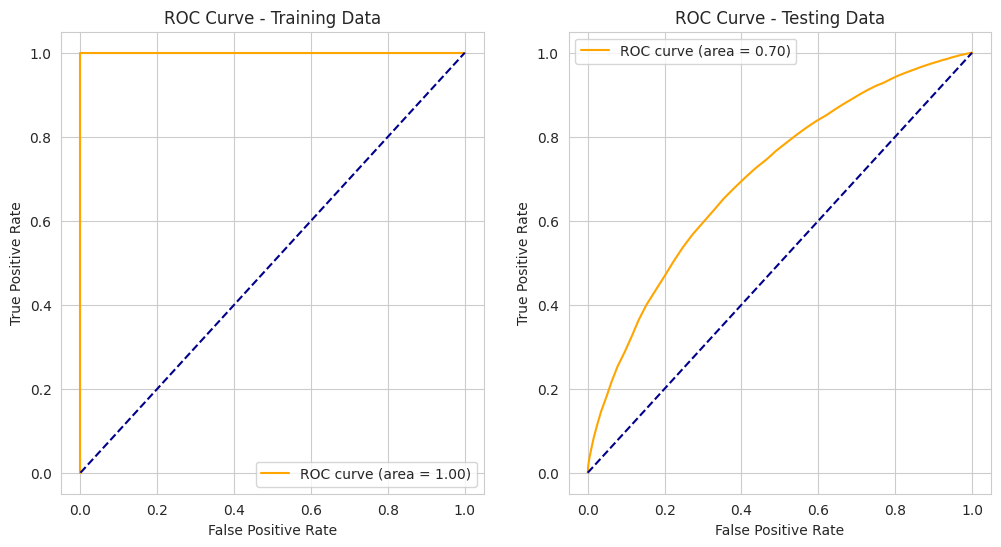

In [ ]:
y_train_prob = rf_classifier.predict_proba(X_train)[:, 1]
y_test_prob = rf_classifier.predict_proba(X_test)[:, 1]


train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)


train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)
print(f"Training AUC: {train_auc}")
print(f"Testing AUC: {test_auc}")


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_fpr, train_tpr, color='orange', label=f"ROC curve (area = {train_auc:.2f})")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_fpr, test_tpr, color='orange', label=f"ROC curve (area = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing Data')
plt.legend()
plt.show()


### Applying SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_smote == 0)))

rf_classifier_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_smote.fit(X_train_smote, y_train_smote)

y_test_pred_smote = rf_classifier_smote.predict(X_test)

print("Accuracy on Testing Set: ", accuracy_score(y_test, y_test_pred_smote))
print("Classification Report on Testing Set:")
print(classification_report(y_test, y_test_pred_smote))

After SMOTE, counts of label '1': 252571
After SMOTE, counts of label '0': 252571
Accuracy on Testing Set:  0.8000203684136825
Classification Report on Testing Set:
              precision    recall  f1-score   support

           0       0.45      0.13      0.20     15301
           1       0.82      0.96      0.89     63252

    accuracy                           0.80     78553
   macro avg       0.64      0.55      0.54     78553
weighted avg       0.75      0.80      0.75     78553



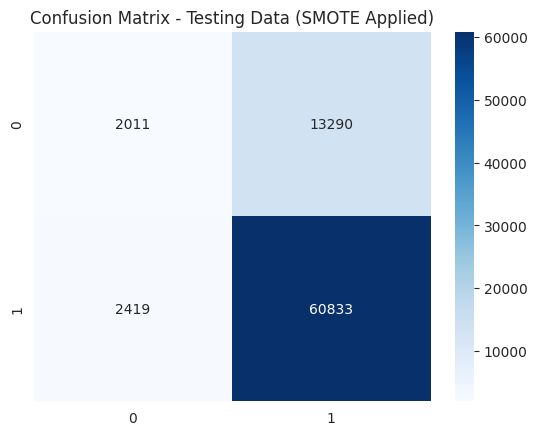

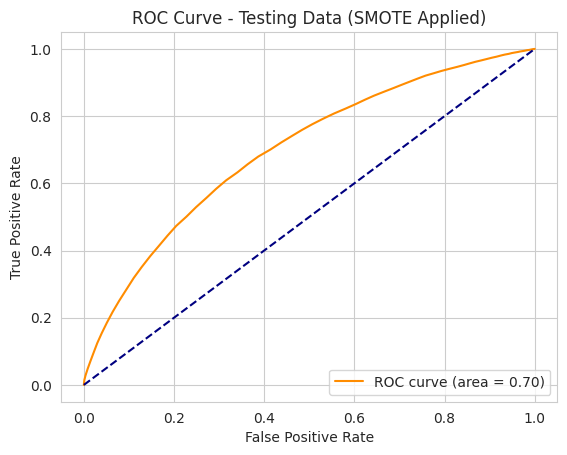

In [ ]:
conf_matrix_smote = confusion_matrix(y_test, y_test_pred_smote)
sns.heatmap(conf_matrix_smote, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix - Testing Data (SMOTE Applied)")
plt.show()

y_test_prob_smote = rf_classifier_smote.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob_smote)
auc = roc_auc_score(y_test, y_test_prob_smote)
plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (area = {auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing Data (SMOTE Applied)')
plt.legend(loc="lower right")
plt.show()

### Applying Threshold Moving

In [ ]:
rf_classifier_balanced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier_balanced.fit(X_train_smote, y_train_smote)
y_test_pred_balanced = rf_classifier_balanced.predict(X_test)

In [ ]:
from sklearn.metrics import precision_recall_curve
import numpy as np


probabilities = rf_classifier_balanced.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, probabilities, pos_label=1)

def adjust_threshold(precisions, recalls, thresholds, target_recall=0.70):
    threshold_index = np.where(recalls >= target_recall)[0][-1]
    return thresholds[threshold_index]

chosen_threshold = adjust_threshold(precision, recall, thresholds, target_recall=0.70)
print("Chosen Threshold:", chosen_threshold)

y_test_pred_adj = (probabilities >= chosen_threshold).astype(int)

print("Adjusted Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_adj))
print("Adjusted Classification Report:\n", classification_report(y_test, y_test_pred_adj))


Chosen Threshold: 0.74
Adjusted Confusion Matrix:
 [[ 8964  6337]
 [18923 44329]]
Adjusted Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.59      0.42     15301
           1       0.87      0.70      0.78     63252

    accuracy                           0.68     78553
   macro avg       0.60      0.64      0.60     78553
weighted avg       0.77      0.68      0.71     78553



Adjusting the decision threshold can have a significant impact on model performance metrics such as recall. By lowering the threshold for predicting class 0, the model can be encouraged to classify more instances as the minority class, potentially increasing recall.